In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d bryanb/fifa-player-stats-database
!unzip fifa-player-stats-database.zip



 98% 13.0M/13.3M [00:00<00:00, 67.4MB/s]
100% 13.3M/13.3M [00:00<00:00, 67.6MB/s]
Archive:  fifa-player-stats-database.zip
  inflating: FIFA17_official_data.csv  
  inflating: FIFA18_official_data.csv  
  inflating: FIFA19_official_data.csv  
  inflating: FIFA20_official_data.csv  
  inflating: FIFA21_official_data.csv  
  inflating: FIFA22_official_data.csv  
  inflating: FIFA23_official_data.csv  


In [ ]:
fifa17 = pd.read_csv('FIFA17_official_data.csv')
fifa18 = pd.read_csv('FIFA18_official_data.csv')
fifa19 = pd.read_csv('FIFA19_official_data.csv')
fifa20 = pd.read_csv('FIFA20_official_data.csv')
fifa21 = pd.read_csv('FIFA21_official_data.csv')
fifa22 = pd.read_csv('FIFA22_official_data.csv')


In [ ]:
# Count the number of null values in each column
null_counts = fifa18.isnull().sum()
print("Null Value Counts:\n", null_counts)

Null Value Counts:
 ID                        0
Name                      0
Age                       0
Photo                     0
Nationality               0
                       ... 
GKPositioning             0
GKReflexes                0
Best Position             0
Best Overall Rating       0
Release Clause         1748
Length: 64, dtype: int64


In [ ]:
def clean_fifa_data(df):
    def convert_column_to_int(df, col_name):
        regex = r'\d+'
        lst = []
        for value in df[col_name]:
            match = re.search(regex, value)
            if match:
                number = int(match.group())
                lst.append(number)
            else:
                lst.append(0)  # handle missing values
        df[col_name] = lst

    # Convert columns to integers
    convert_column_to_int(df, "Value")
    convert_column_to_int(df, "Wage")
    convert_column_to_int(df, "Height")
    convert_column_to_int(df, "Weight")

    # Extract the body type from values that contain additional information
    df['Body Type'] = df['Body Type'].str.extract('(Normal|Stocky|Unique|Lean)')

    # Drop unnecessary columns
    columns_to_drop = ['Photo','Flag', 'Club Logo', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until',' Jersey Number','Release Clause']
    for column in columns_to_drop:
        if column in df.columns:
            df = df.drop(column, axis=1)

    return df


In [ ]:
# Clean each dataset using the function
fifa17 = clean_fifa_data(fifa17)
fifa18 = clean_fifa_data(fifa18)
fifa19 = clean_fifa_data(fifa19)
fifa20 = clean_fifa_data(fifa20)
fifa21 = clean_fifa_data(fifa21)
fifa22 = clean_fifa_data(fifa22)

In [ ]:
# export to pycharm

# Assuming your data is stored in a DataFrame called 'df'
fifa17.to_csv('fifa17.csv', index=False)  # Save DataFrame as CSV
fifa18.to_csv('fifa18.csv', index=False)  # Save DataFrame as CSV
fifa19.to_csv('fifa19.csv', index=False)  # Save DataFrame as CSV
fifa20.to_csv('fifa20.csv', index=False)  # Save DataFrame as CSV
fifa21.to_csv('fifa21.csv', index=False)  # Save DataFrame as CSV
fifa22.to_csv('fifa22.csv', index=False)  # Save DataFrame as CSV

from google.colab import files

files.download('fifa17.csv')  # Download the CSV file
files.download('fifa18.csv')  # Download the CSV file
files.download('fifa19.csv')  # Download the CSV file
files.download('fifa20.csv')  # Download the CSV file
files.download('fifa21.csv')  # Download the CSV file
files.download('fifa22.csv')  # Download the CSV file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fifa17["Best Position"].unique()


array(['ST', 'CDM', 'LB', 'CAM', 'RB', 'LWB', 'CM', 'RWB', 'RM', 'LM',
       'CB', 'LW', 'CF', 'RW', 'GK'], dtype=object)

In [ ]:
def split_by_position(df):
    # Filter rows for defenders
    df_defender = df[(df['Best Position'].isin(['CB', 'RB', 'LB', 'RWB', 'LWB']))]

    # Filter rows for midfielders
    df_midfielder = df[(df['Best Position'].isin(['CM', 'CDM', 'CAM', 'RM', 'LM']))]

    # Filter rows for forwards
    df_forward = df[(df['Best Position'].isin(['ST', 'CF', 'RW', 'LW']))]

    # Filter rows for goalkeepers
    df_goalkeeper = df[(df['Best Position'].isin(['GK']))]

    return df_defender, df_midfielder, df_forward, df_goalkeeper



In [ ]:
fifa17_defender, fifa17_midfielder, fifa17_forward, fifa17_goalkeeper = split_by_position(fifa17)
fifa18_defender, fifa18_midfielder, fifa18_forward, fifa18_goalkeeper = split_by_position(fifa18)
fifa19_defender, fifa19_midfielder, fifa19_forward, fifa19_goalkeeper = split_by_position(fifa19)
fifa20_defender, fifa20_midfielder, fifa20_forward, fifa20_goalkeeper = split_by_position(fifa20)
fifa21_defender, fifa21_midfielder, fifa21_forward, fifa21_goalkeeper = split_by_position(fifa21)
fifa22_defender, fifa22_midfielder, fifa22_forward, fifa22_goalkeeper = split_by_position(fifa22)




In [ ]:
# fifa17_defender, fifa17_midfielder, fifa17_forward, fifa17_goalkeeper
# fifa18_defender, fifa18_midfielder, fifa18_forward, fifa18_goalkeeper
# fifa19_defender, fifa19_midfielder, fifa19_forward, fifa19_goalkeeper
# fifa20_defender, fifa20_midfielder, fifa20_forward, fifa20_goalkeeper
# fifa21_defender, fifa21_midfielder, fifa21_forward, fifa21_goalkeeper
# fifa22_defender, fifa22_midfielder, fifa22_forward, fifa22_goalkeeper

# What is the relationship between the player's individual ability ratings and his overall rating in the game throughout The years 2017-2022?


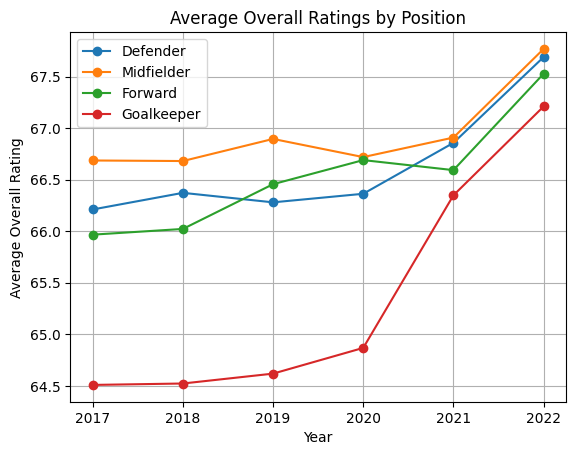

In [ ]:
# Calculate the average overall rating for each position in each year
overall_ratings = {
    'Defender': [fifa17_defender['Overall'].mean(), fifa18_defender['Overall'].mean(),
                 fifa19_defender['Overall'].mean(), fifa20_defender['Overall'].mean(),
                 fifa21_defender['Overall'].mean(), fifa22_defender['Overall'].mean()],
    'Midfielder': [fifa17_midfielder['Overall'].mean(), fifa18_midfielder['Overall'].mean(),
                   fifa19_midfielder['Overall'].mean(), fifa20_midfielder['Overall'].mean(),
                   fifa21_midfielder['Overall'].mean(), fifa22_midfielder['Overall'].mean()],
    'Forward': [fifa17_forward['Overall'].mean(), fifa18_forward['Overall'].mean(),
                fifa19_forward['Overall'].mean(), fifa20_forward['Overall'].mean(),
                fifa21_forward['Overall'].mean(), fifa22_forward['Overall'].mean()],
    'Goalkeeper': [fifa17_goalkeeper['Overall'].mean(), fifa18_goalkeeper['Overall'].mean(),
                   fifa19_goalkeeper['Overall'].mean(), fifa20_goalkeeper['Overall'].mean(),
                   fifa21_goalkeeper['Overall'].mean(), fifa22_goalkeeper['Overall'].mean()]
}

# Create the bar chart
years = range(2017, 2023)
positions = overall_ratings.keys()

fig, ax = plt.subplots()
for position in positions:
    ax.plot(years, overall_ratings[position], marker='o', label=position)

ax.set_xlabel('Year')
ax.set_ylabel('Average Overall Rating')
ax.set_title('Average Overall Ratings by Position')
ax.legend()
ax.grid(True)

plt.show()


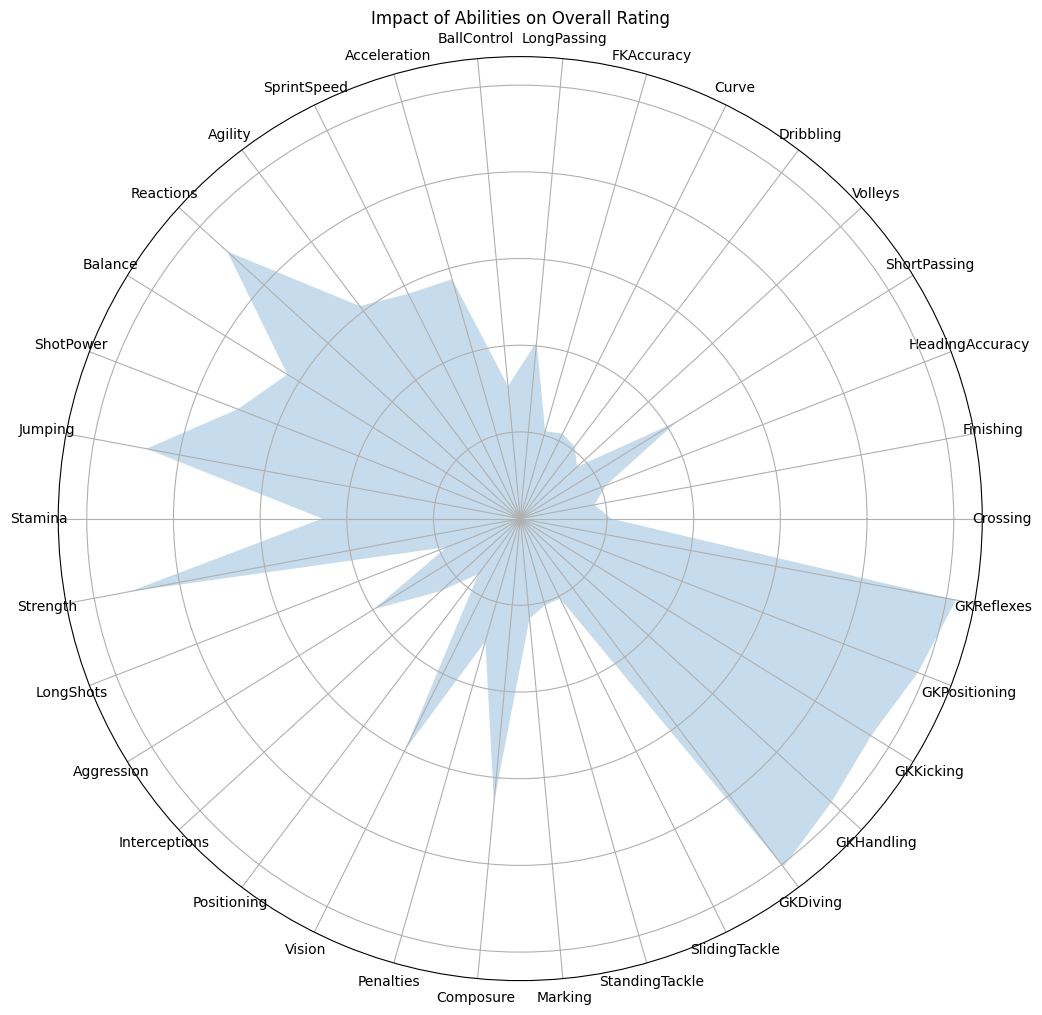

In [ ]:
# Select personal ability ratings and overall ratings for each player
ability_ratings = fifa22_goalkeeper[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                                   'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                   'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
                                   'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                                   'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                   'GKKicking', 'GKPositioning', 'GKReflexes']]

overall_ratings = fifa22_goalkeeper['Overall']

# Calculate the average ratings for each ability
average_ratings = ability_ratings.mean()
average_overall = overall_ratings.mean()

# Normalize the average ratings and overall rating
normalized_ratings = average_ratings / average_overall

# Set up the radar chart
categories = normalized_ratings.index
values = normalized_ratings.values

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticklabels([])
ax.set_title('Impact of Abilities on Overall Rating')

plt.show()


In [ ]:
# option 3 - one radar of the averages values
def plot_summary_radar_chart(lst,main_title):
  all_ability_ratings = []
  all_overall_ratings = []

  # Iterate over the datasets
  for dataset, title in lst:
      # Select personal ability ratings and overall ratings for each player
      ability_ratings = dataset[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                                'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
                                'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                                'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                'GKKicking', 'GKPositioning', 'GKReflexes']]
      overall_ratings = dataset['Overall']

      # Append the ability ratings and overall ratings to the lists
      all_ability_ratings.append(ability_ratings)
      all_overall_ratings.append(overall_ratings)

  # Concatenate all the ability ratings and overall ratings
  all_ability_ratings = pd.concat(all_ability_ratings)
  all_overall_ratings = pd.concat(all_overall_ratings)

  # Calculate the average ratings for each ability
  average_ratings = all_ability_ratings.mean()
  average_overall = all_overall_ratings.mean()

  # Normalize the average ratings and overall rating
  normalized_ratings = average_ratings / average_overall

  # Set up the radar chart
  categories = normalized_ratings.index
  values = normalized_ratings.values

  angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
  values = np.concatenate((values, [values[0]]))
  angles = np.concatenate((angles, [angles[0]]))

  fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
  ax.fill(angles, values, alpha=0.25)
  ax.set_xticks(angles[:-1])
  ax.set_xticklabels(categories)
  ax.set_yticklabels([])
  ax.set_title(main_title)

  plt.show()


In [ ]:
# fifa17_defender, fifa17_midfielder, fifa17_forward, fifa17_goalkeeper
defender_lst = [(fifa17_defender,"fifa 17 defender"), (fifa18_defender,"fifa 18 defender"), (fifa19_defender,"fifa 19 defender"), (fifa20_defender, "fifa 20 defender"), (fifa21_defender, "fifa 21 defender"),(fifa22_defender, "fifa 22 defender")]
midfielder_lst = [(fifa17_midfielder,"fifa 17 midfielder"), (fifa18_midfielder,"fifa 18 midfielder"), (fifa19_midfielder,"fifa 19 midfielder"), (fifa20_midfielder, "fifa 20 midfielder"), (fifa21_midfielder, "fifa 21 midfielder"),(fifa22_defender, "fifa 22 midfielder")]
forward_lst = [(fifa17_forward,"fifa 17 forward"), (fifa18_forward,"fifa 18 forward"), (fifa19_forward,"fifa 19 forward"), (fifa20_forward, "fifa 20 forward"), (fifa21_forward, "fifa 21 forward"),(fifa22_forward, "fifa 22 forward")]
goalkeeper_lst = [(fifa17_goalkeeper,"fifa 17 goalkeeper"), (fifa18_goalkeeper,"fifa 18 goalkeeper"), (fifa19_goalkeeper,"fifa 19 goalkeeper"), (fifa20_goalkeeper, "fifa 20 goalkeeper"), (fifa21_goalkeeper, "fifa 21 goalkeeper"),(fifa22_goalkeeper, "fifa 22 goalkeeper")]
# fifa17_defender, fifa17_midfielder, fifa17_forward, fifa17_goalkeeper
# defender_lst = [fifa17_defender, fifa18_defender, fifa19_defender, fifa20_defender, fifa21_defender,fifa22_defender]
# midfielder_lst = [fifa17_midfielder,fifa18_midfielder, fifa19_midfielder, fifa20_midfielder, fifa21_midfielder,fifa22_midfielder]
# forward_lst =[fifa17_forward,fifa18_forward, fifa19_forward, fifa20_forward, fifa21_forward,fifa22_forward]
# goalkeeper_lst = [fifa17_goalkeeper,fifa18_goalkeeper, fifa19_goalkeeper, fifa20_goalkeeper, fifa21_goalkeeper,fifa22_goalkeeper]

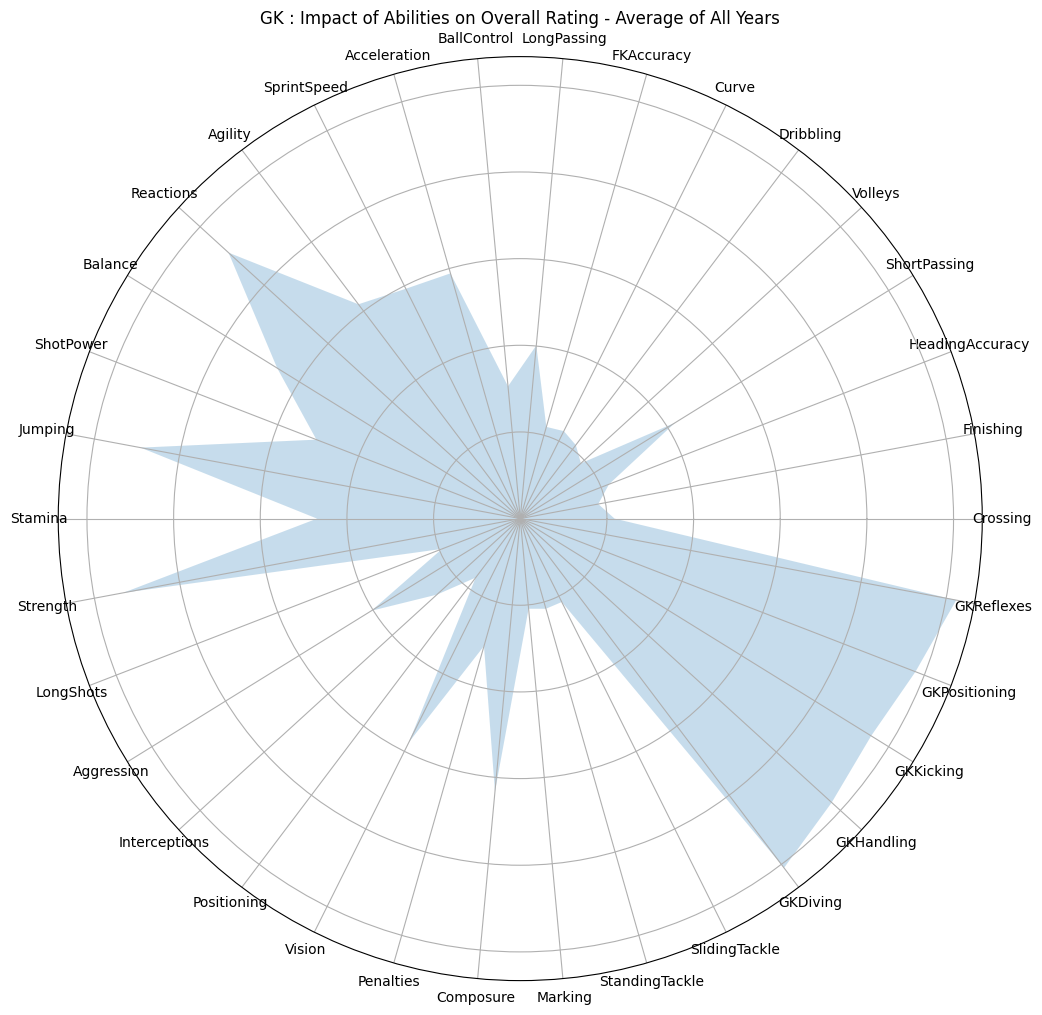

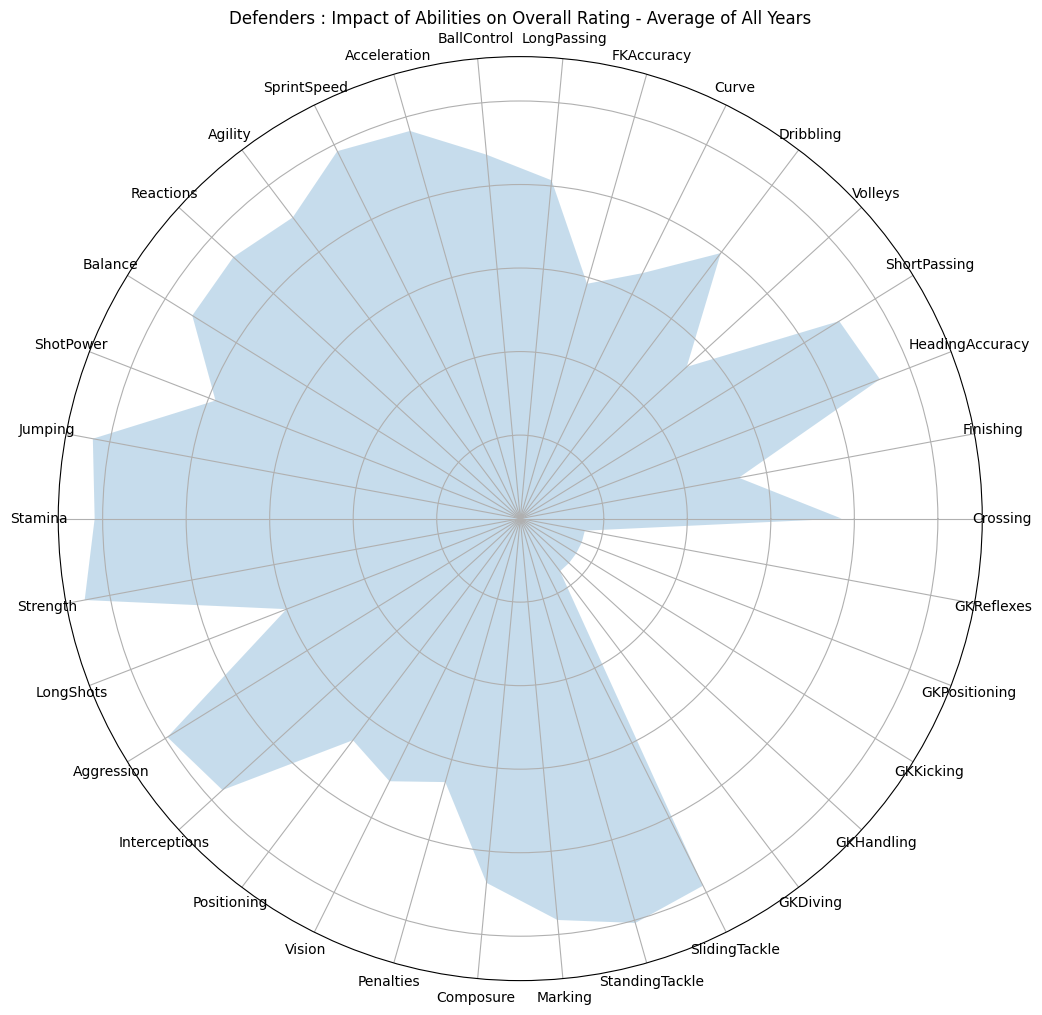

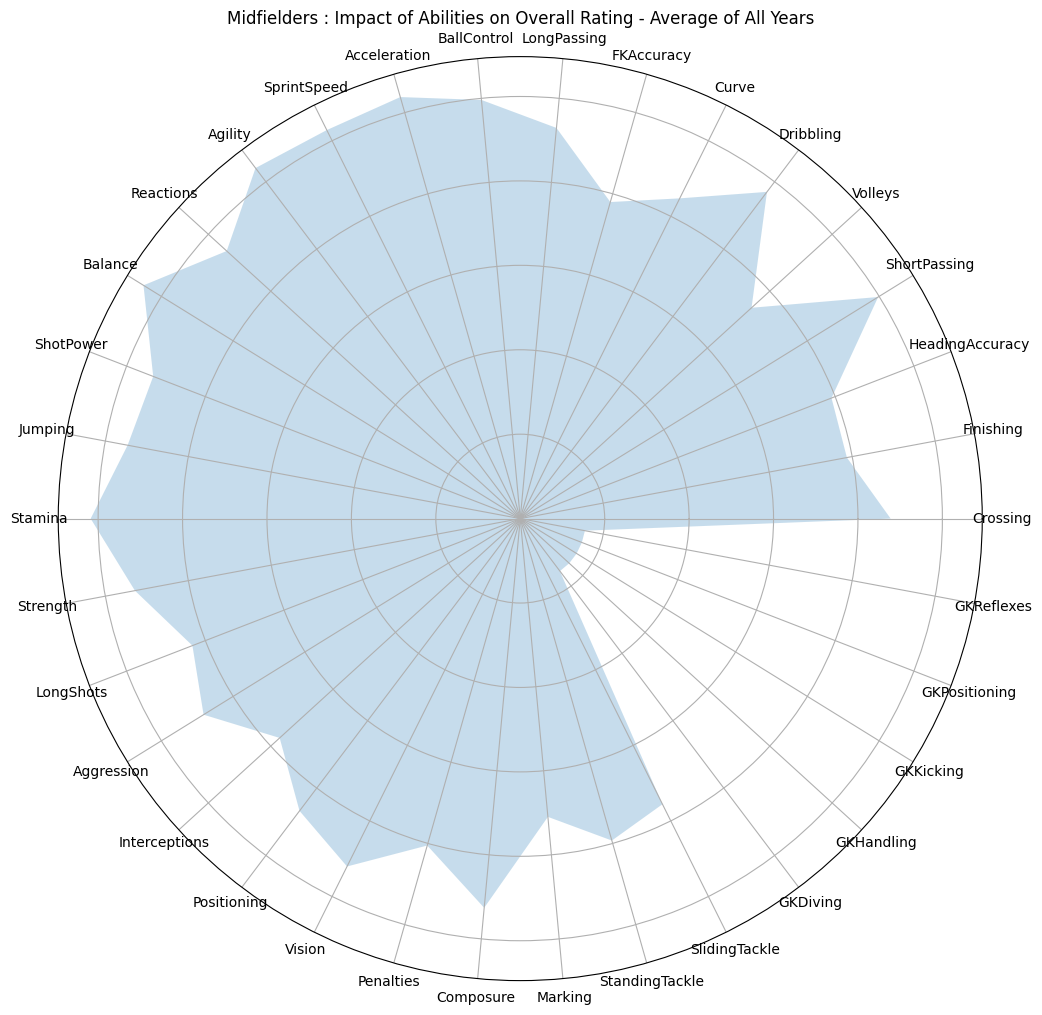

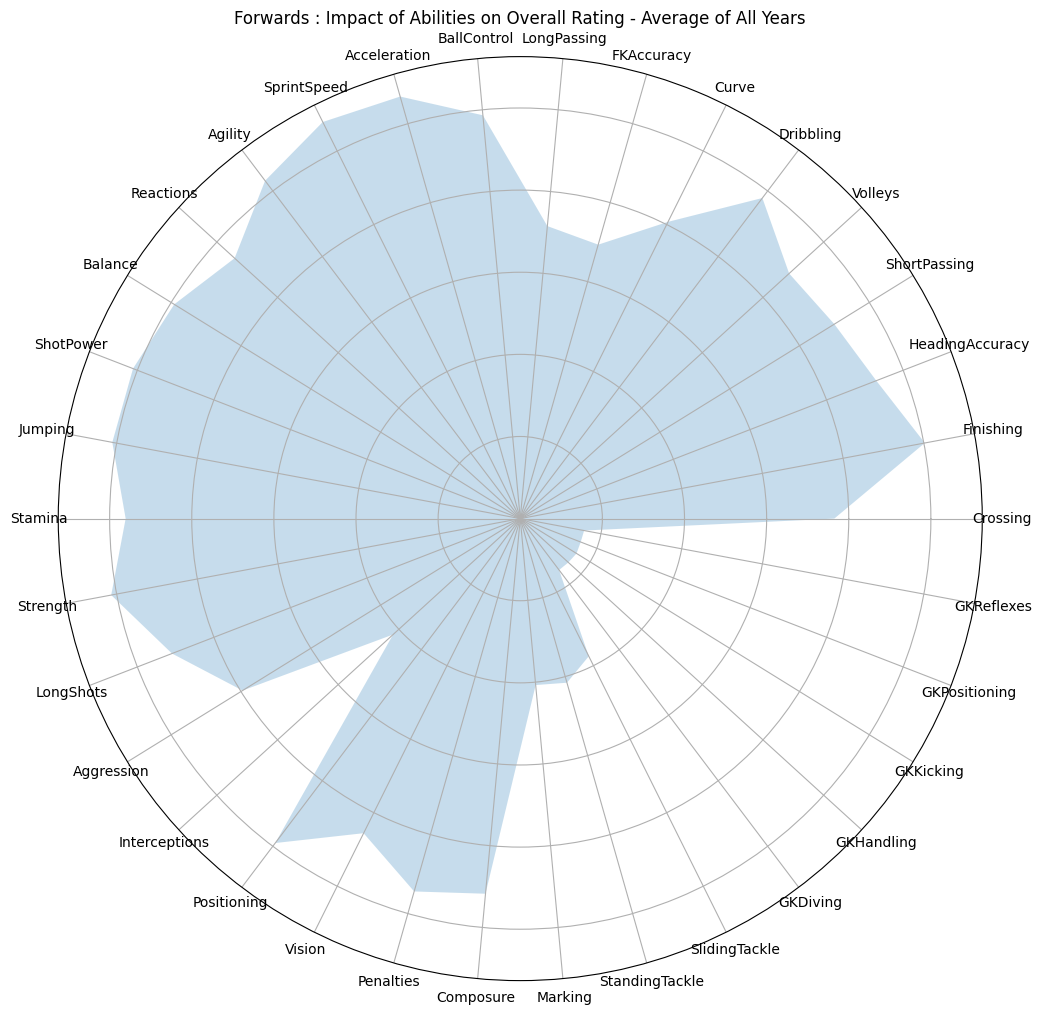

In [ ]:

gk_avg_plot = plot_summary_radar_chart(goalkeeper_lst,'GK : Impact of Abilities on Overall Rating - Average of All Years')
def_avg_plot = plot_summary_radar_chart(defender_lst,'Defenders : Impact of Abilities on Overall Rating - Average of All Years')
mid_avg_plot = plot_summary_radar_chart(midfielder_lst,'Midfielders : Impact of Abilities on Overall Rating - Average of All Years')
att_avg_plot = plot_summary_radar_chart(forward_lst,'Forwards : Impact of Abilities on Overall Rating - Average of All Years')

In [ ]:
ability_ratings = fifa22_goalkeeper[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                                   'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                   'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
                                   'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                                   'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                   'GKKicking', 'GKPositioning', 'GKReflexes']]
overall_ratings = fifa22_goalkeeper['Overall']

In [ ]:
def plot_correlation(lst,position):
    fig, axes = plt.subplots(3, 2, figsize=(12, 16))
    axes = axes.flatten()


    for i, (dataset, title) in enumerate(lst):
        ability_ratings = dataset[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                                   'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                   'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
                                   'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                                   'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                   'GKKicking', 'GKPositioning', 'GKReflexes']]
        overall_ratings = dataset['Overall']

        # Calculate correlation between personal abilities and overall rating
        correlation_matrix = ability_ratings.corrwith(overall_ratings)

        # Sort the correlations in descending order
        sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

        # Reverse the color order
        colors = sns.color_palette('coolwarm', len(sorted_correlations))[::-1]

        # Plot the sorted correlations with reversed colors
        ax = axes[i]
        sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette=colors, ax=ax)
        ax.set_xlabel('Correlation')
        ax.set_ylabel('Personal Ability')
        ax.set_title(title)

        # Add numbers on the bars
        for j, correlation in enumerate(sorted_correlations.values):
            ax.text(correlation, j, f'{correlation:.2f}', ha='left', va='center')
    plt.suptitle(f'{position}: Correlation between Personal Abilities and Overall Rating\n', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()



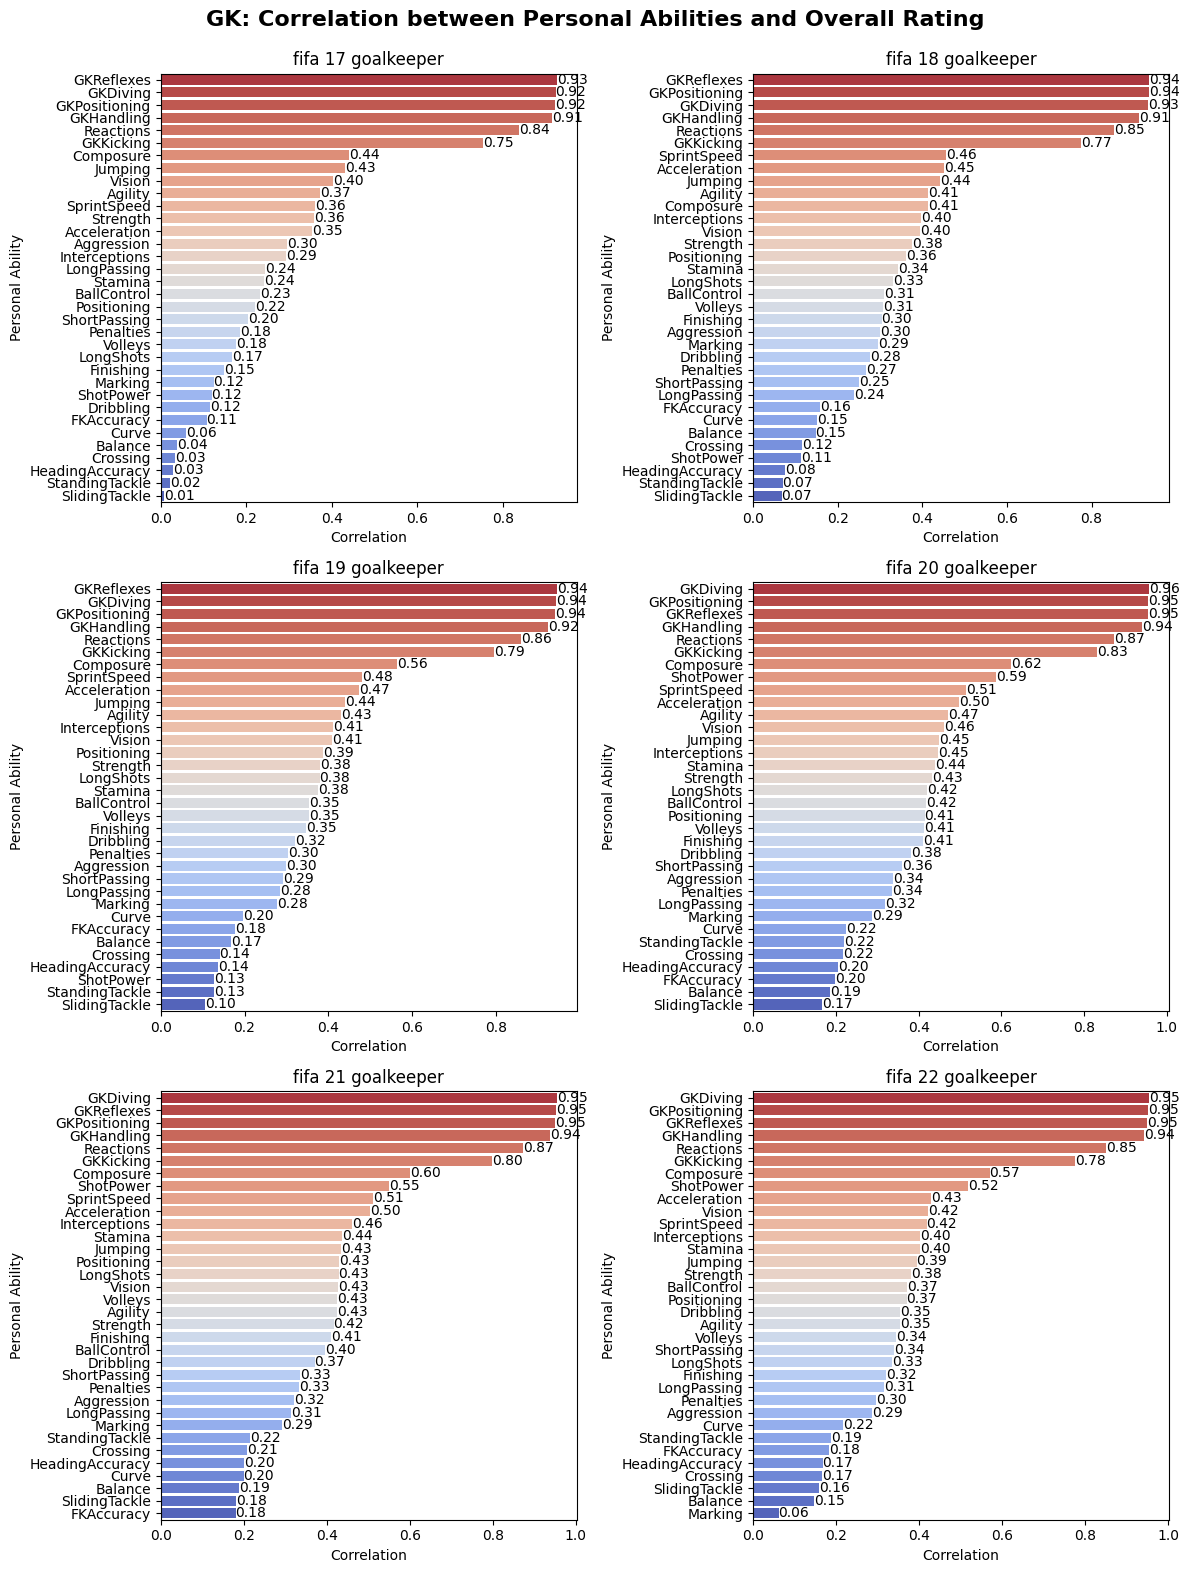

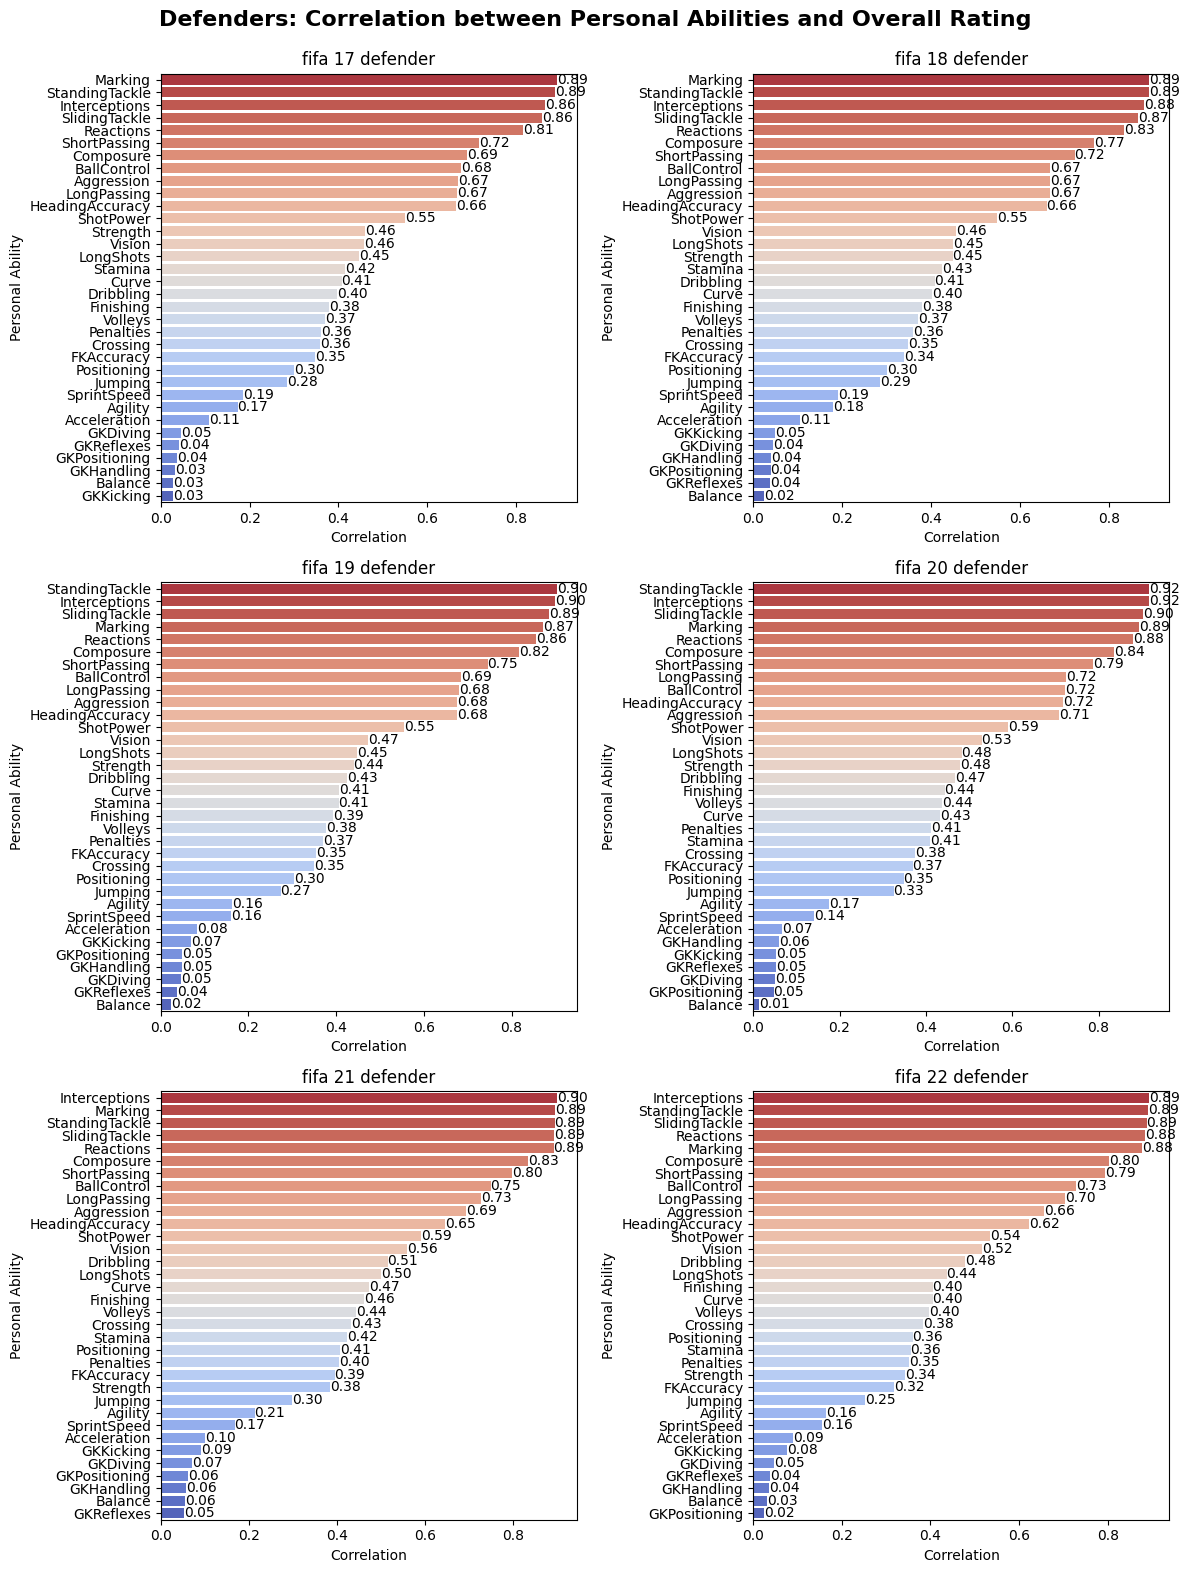

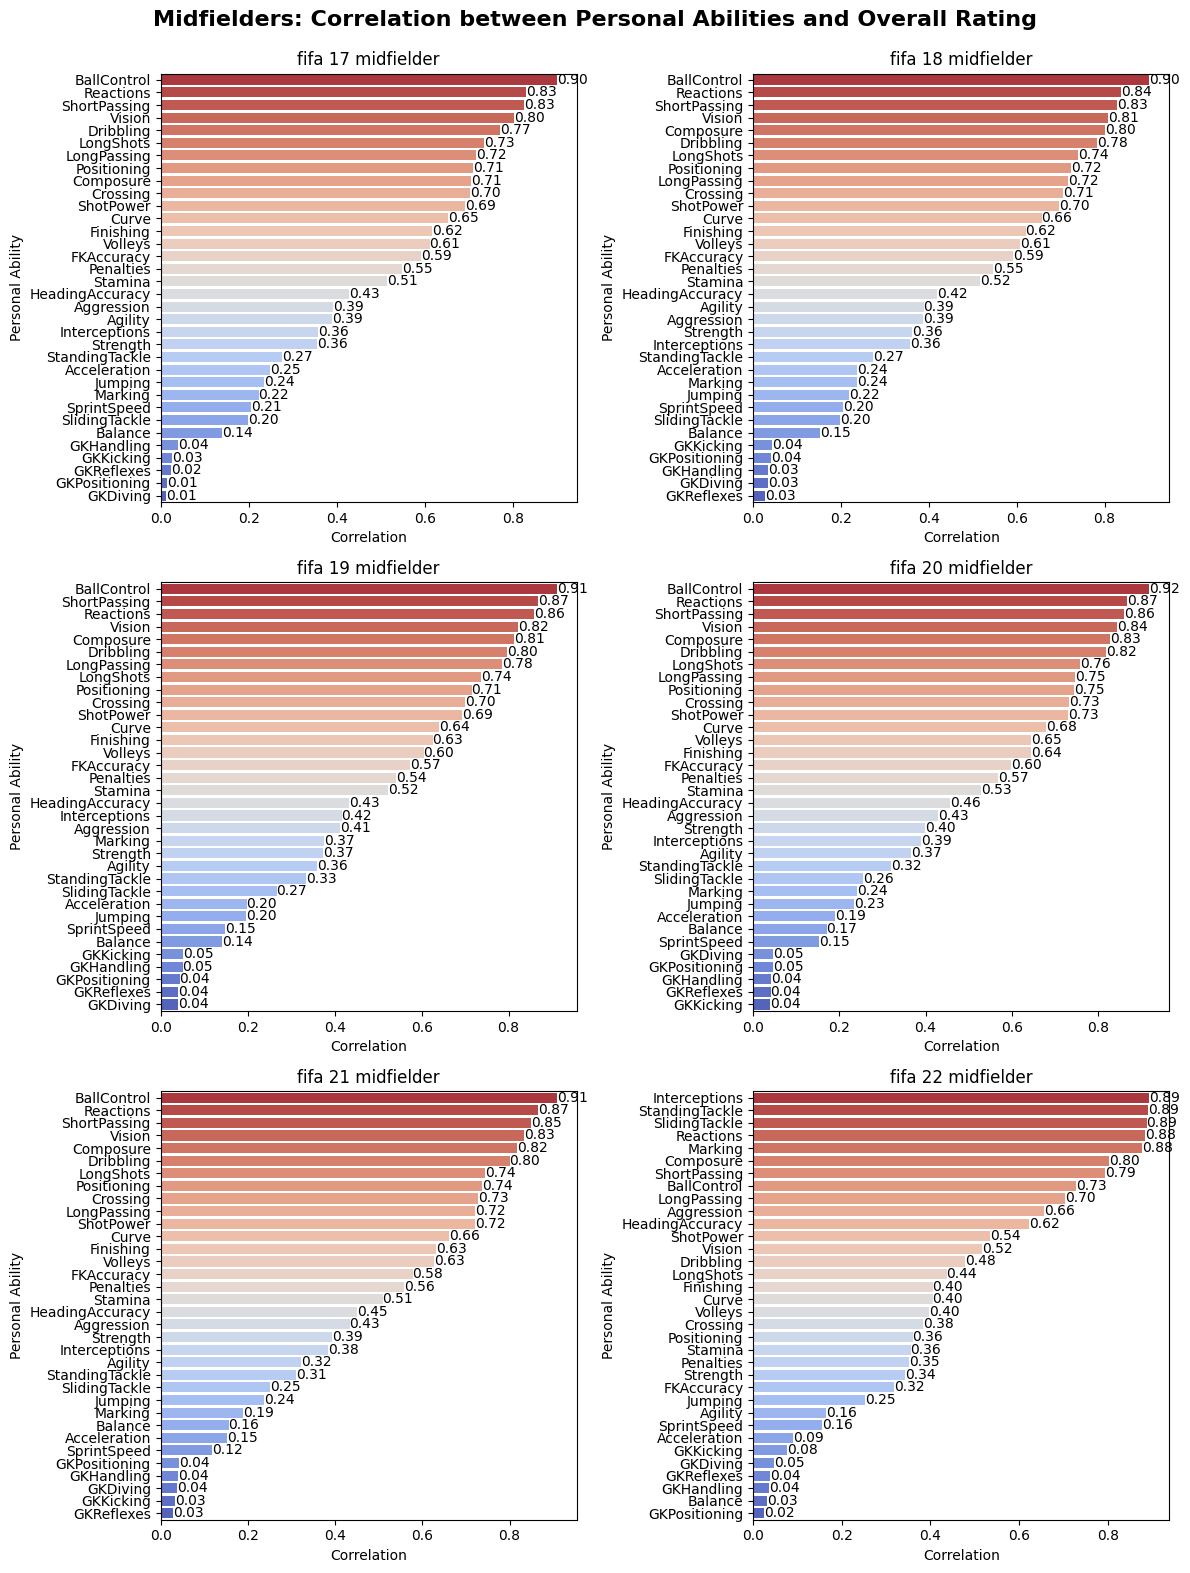

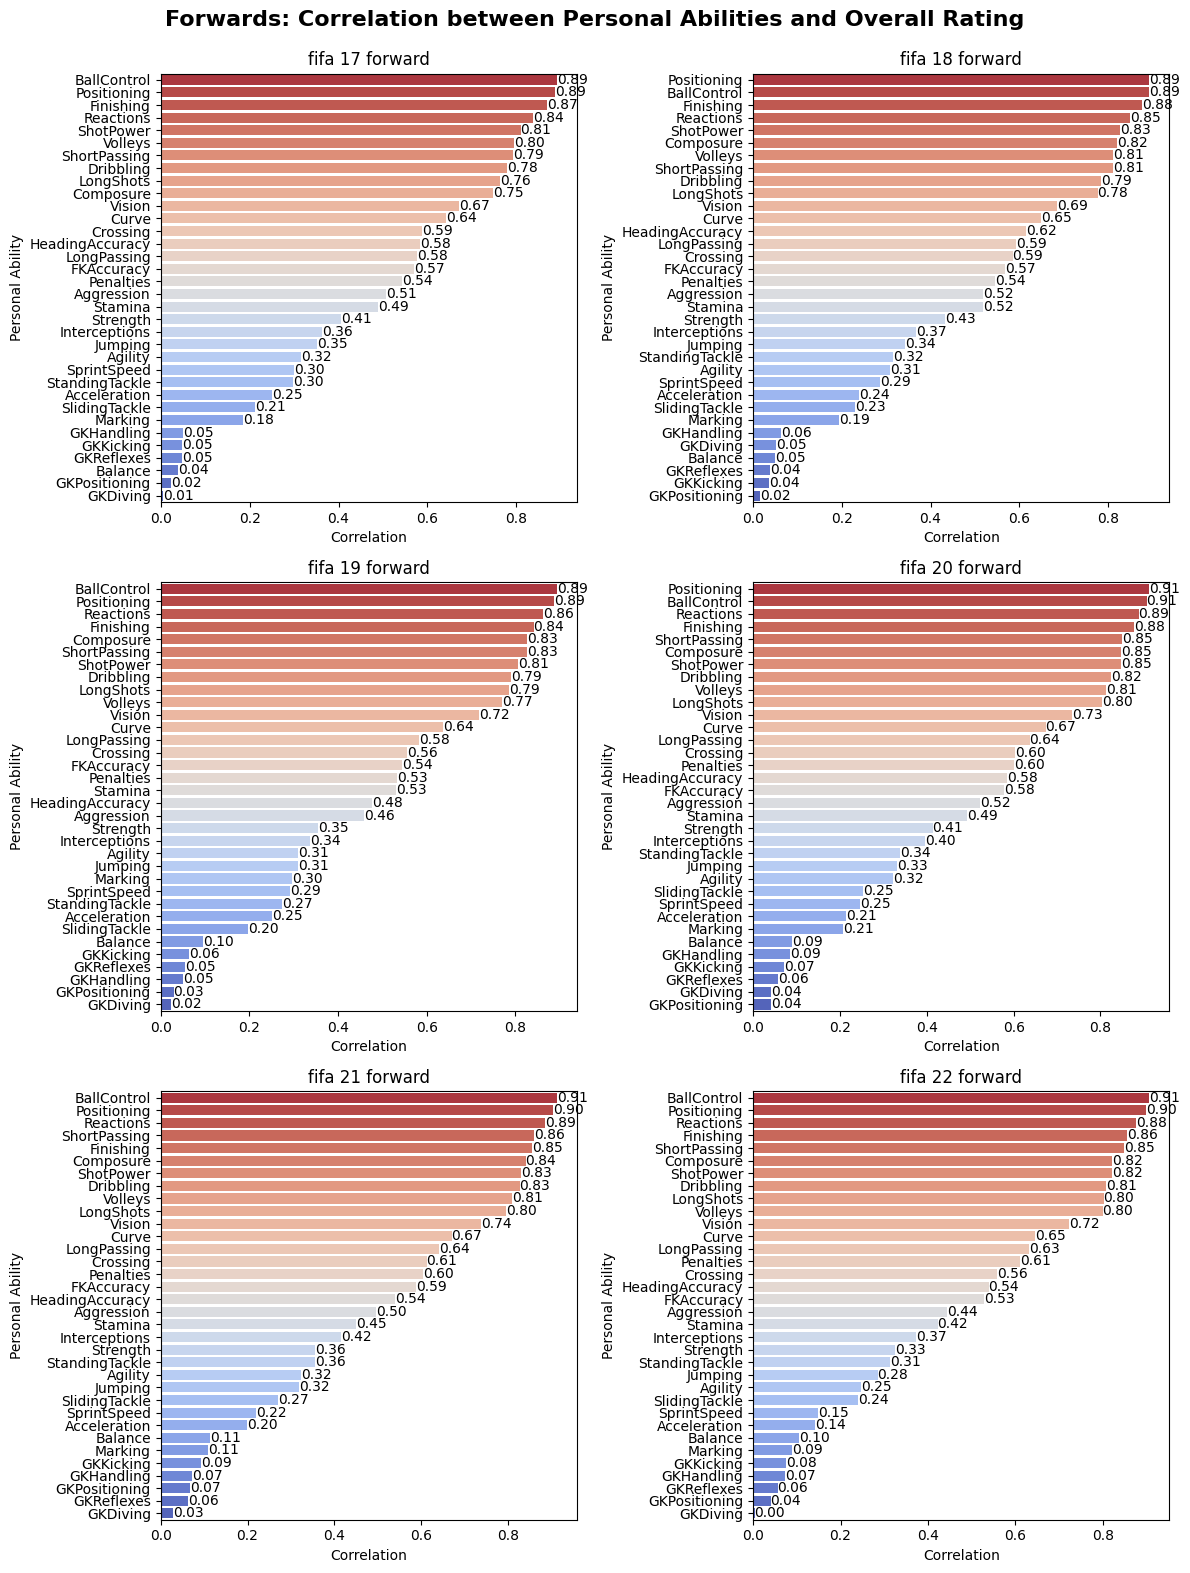

In [ ]:
roles_lst = [(goalkeeper_lst,"GK"),(defender_lst,"Defenders"),(midfielder_lst,"Midfielders"),(forward_lst,"Forwards")]
for lst,role in roles_lst :
  plot_correlation(lst,role)

In [ ]:
# notice :
#gk  short passing

In [ ]:
def plot_average_correlation(lst, title_pos):
    # Create an empty DataFrame to store the combined data
    combined_dataset = pd.DataFrame()

    # Combine the data from all the years into one DataFrame
    for dataset, title in lst:
        combined_dataset = pd.concat([combined_dataset, dataset])

    ability_ratings = combined_dataset[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                                        'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                        'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
                                        'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                                        'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                        'GKKicking', 'GKPositioning', 'GKReflexes']]
    overall_ratings = combined_dataset['Overall']

    # Calculate correlation between personal abilities and overall rating
    correlation_matrix = ability_ratings.corrwith(overall_ratings)

    # Sort the correlations in descending order
    sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

    # Reverse the color order
    colors = sns.color_palette('coolwarm', len(sorted_correlations))[::-1]

    # Plot the sorted correlations with reversed colors
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette=colors)
    plt.xlabel('Correlation')
    plt.ylabel('Personal Ability')
    plt.title(f'{title_pos} Average Correlation between Personal Abilities and Overall Rating')

    # Add numbers on the bars
    for i, correlation in enumerate(sorted_correlations.values):
        plt.text(correlation, i, f'{correlation:.2f}', ha='left', va='center')

    plt.show()

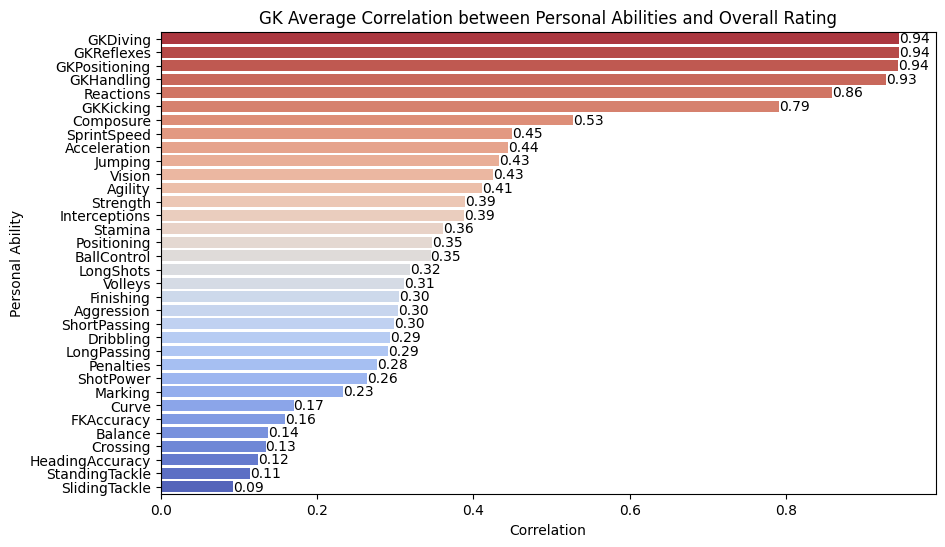

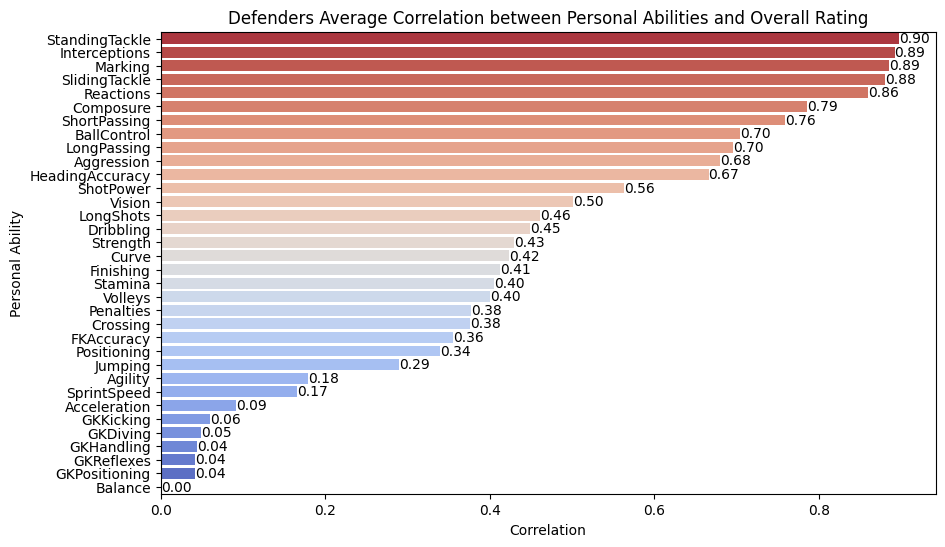

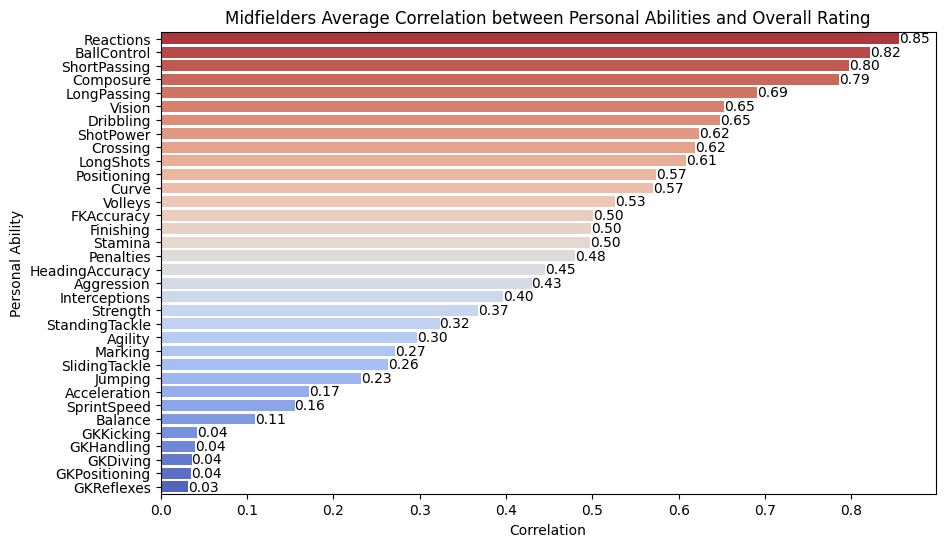

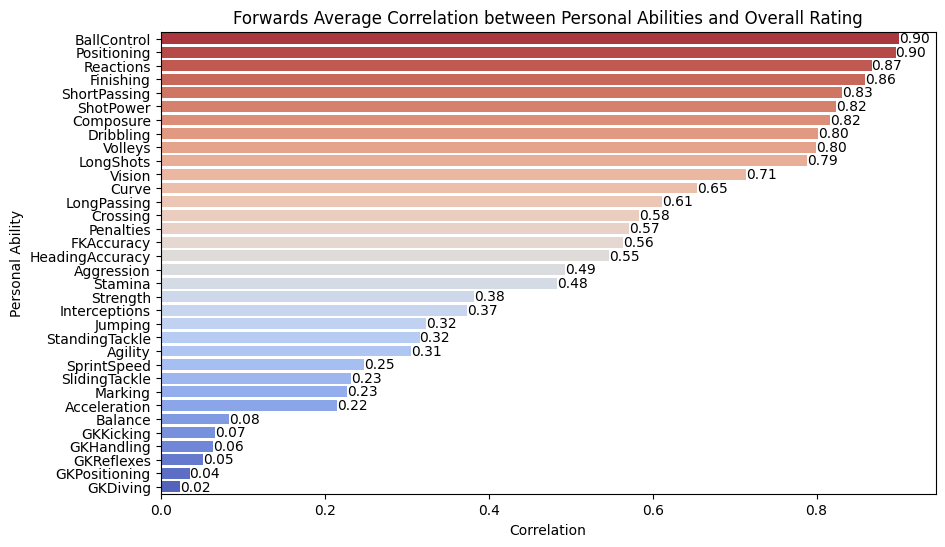

In [ ]:
plot_average_correlation(goalkeeper_lst , "GK")
plot_average_correlation(defender_lst , "Defenders")
plot_average_correlation(midfielder_lst, "Midfielders")
plot_average_correlation(forward_lst,"Forwards")

# Who is better in FIFA, Messi or Ronaldo?

In [ ]:
fifa22.loc[fifa22['ID'] == 20801, 'Name'] = ' Cristiano Ronaldo'
fifa22.loc[fifa22['ID'] == 158023, 'Name'] = ' L. Messi'


In [ ]:
def calculate_average_correlation(lst):
    all_sorted_correlations = []

    for dataset, title in lst:
        ability_ratings = dataset[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                                   'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                   'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
                                   'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                                   'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                   'GKKicking', 'GKPositioning', 'GKReflexes']]
        overall_ratings = dataset['Overall']

        # Calculate correlation between personal abilities and overall rating
        correlation_matrix = ability_ratings.corrwith(overall_ratings)

        # Sort the correlations in descending order
        sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

        return sorted_correlations


abilities_to_check = calculate_average_correlation(forward_lst).to_dict()
top_abilities = list(abilities_to_check.keys())[:11]
top_abilities.insert(0,"Overall")

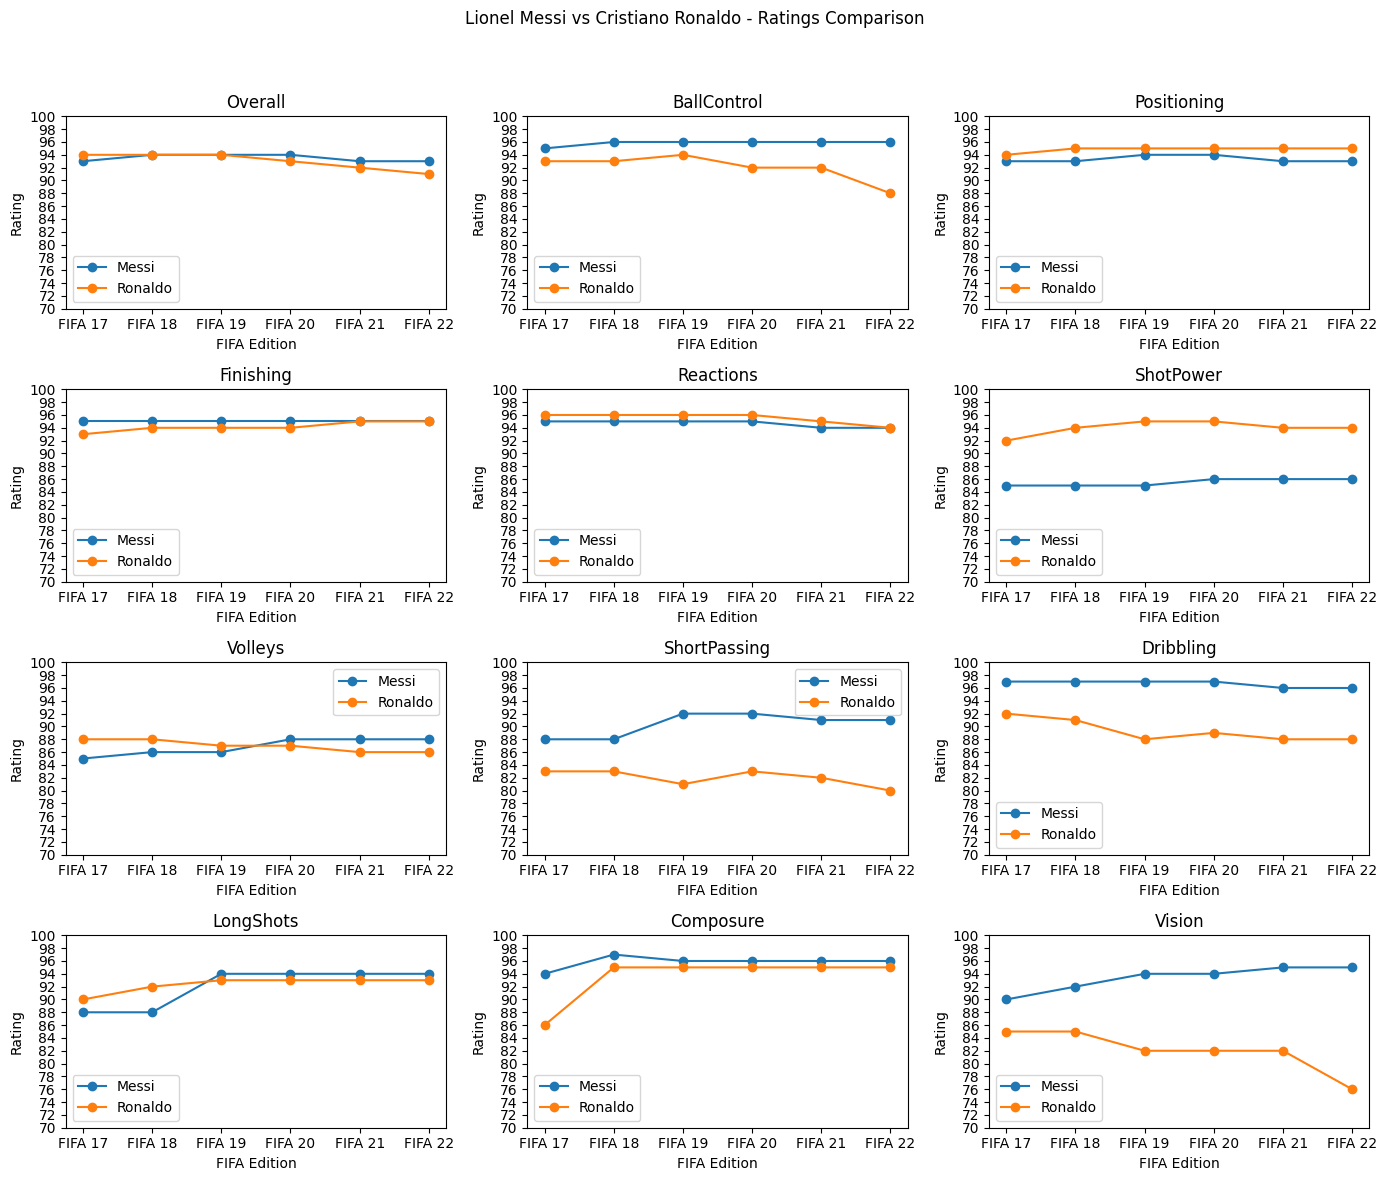

In [ ]:
from collections import defaultdict

# Initialize empty lists for each player's ratings
messi_ratings = ronaldo_ratings = defaultdict(list)
ronaldo_ratings = {ability: [] for ability in top_abilities}
messi_ratings = {ability: [] for ability in top_abilities}



# Check if Messi and Ronaldo exist in each dataset and extract their ratings for each feature
datasets = [fifa17, fifa18, fifa19, fifa20, fifa21, fifa22]
features = top_abilities

for dataset in datasets:
    for feature in features:
            messi_ratings[feature].append(dataset.loc[dataset['Name'] == ' L. Messi', feature].values[0])
            ronaldo_ratings[feature].append(dataset.loc[dataset['Name'] == ' Cristiano Ronaldo', feature].values[0])

years = ['FIFA 17', 'FIFA 18', 'FIFA 19', 'FIFA 20', 'FIFA 21', 'FIFA 22']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
plt.suptitle('Lionel Messi vs Cristiano Ronaldo - Ratings Comparison')

# Plot each feature on a separate subplot
for i, ax in enumerate(axes.flat):
    feature = features[i]
    ax.plot(years, messi_ratings[feature], marker='o', label='Messi')
    ax.plot(years, ronaldo_ratings[feature], marker='o', label='Ronaldo')
    ax.set_title(feature)
    ax.set_xlabel('FIFA Edition')
    ax.set_ylabel('Rating')
    ax.legend()

    # Set y-axis limits and ticks
    ax.set_ylim(70, 100)
    ax.set_yticks(range(70, 101, 2))

# Adjust the layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()



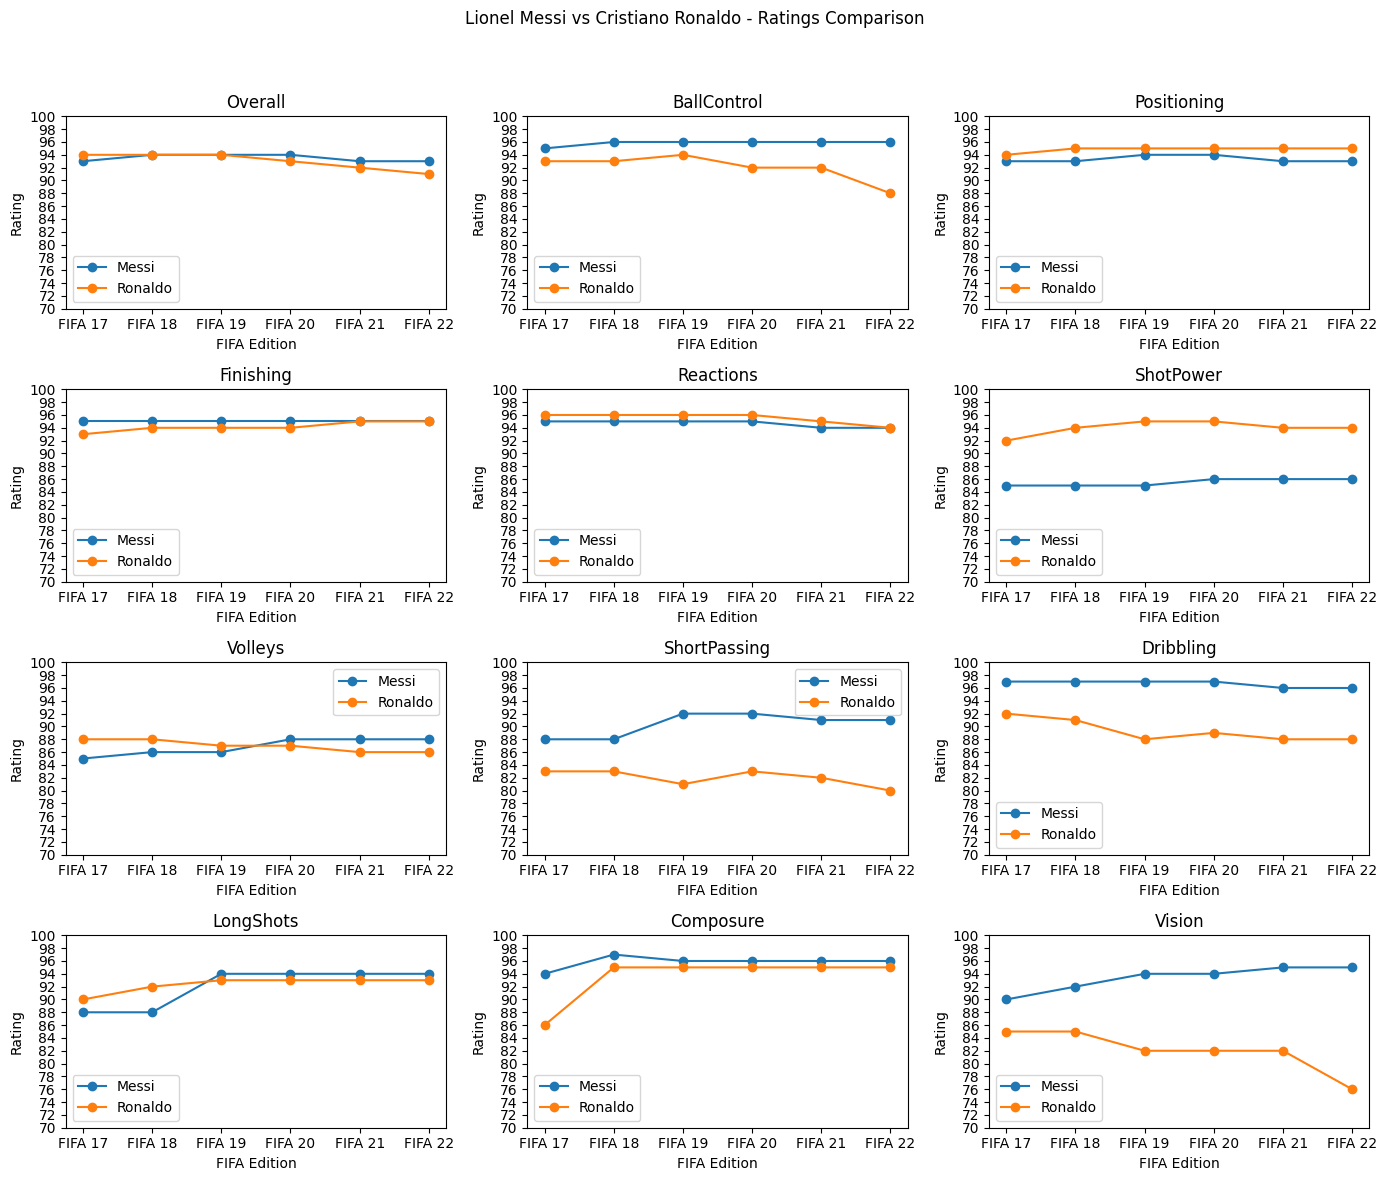

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Initialize empty lists for each player's ratings
messi_ratings = defaultdict(list)
ronaldo_ratings = defaultdict(list)

# Check if Messi and Ronaldo exist in each dataset and extract their ratings for each feature
datasets = [fifa17, fifa18, fifa19, fifa20, fifa21, fifa22]
features = top_abilities

for dataset in datasets:
    for feature in features:
        messi_ratings[feature].append(dataset.loc[dataset['Name'] == ' L. Messi', feature].values[0])
        ronaldo_ratings[feature].append(dataset.loc[dataset['Name'] == ' Cristiano Ronaldo', feature].values[0])

years = ['FIFA 17', 'FIFA 18', 'FIFA 19', 'FIFA 20', 'FIFA 21', 'FIFA 22']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
plt.suptitle('Lionel Messi vs Cristiano Ronaldo - Ratings Comparison')

# Plot each feature on a separate subplot
for i, ax in enumerate(axes.flat):
    feature = features[i]
    line1, = ax.plot(years, messi_ratings[feature], marker='o', label='Messi')
    line2, = ax.plot(years, ronaldo_ratings[feature], marker='o', label='Ronaldo')
    ax.set_title(feature)
    ax.set_xlabel('FIFA Edition')
    ax.set_ylabel('Rating')
    ax.legend()

    # Set y-axis limits and ticks
    ax.set_ylim(70, 100)
    ax.set_yticks(range(70, 101, 2))

    # Create an annotation widget to display the ratings on hover
    annot = ax.annotate("", xy=(0, 0), xytext=(-20, 20),
                         textcoords="offset points",
                         bbox=dict(boxstyle="round", fc="w"),
                         arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)

    def update_annot(line, ind):
        x, y = line.get_data()
        annot.xy = (x[ind], y[ind])
        text = f"({x[ind]}, {y[ind]})"
        annot.set_text(text)

    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == ax:
            cont, ind = line1.contains(event)
            if cont:
                update_annot(line1, ind["ind"][0])
                annot.set_visible(True)
                fig.canvas.draw_idle()
                return
            cont, ind = line2.contains(event)
            if cont:
                update_annot(line2, ind["ind"][0])
                annot.set_visible(True)
                fig.canvas.draw_idle()
                return
        if vis:
            annot.set_visible(False)
            fig.canvas.draw_idle()

    fig.canvas.mpl_connect("motion_notify_event", hover)

# Adjust the layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()



# Is the player's potential in the early years realized in the following years?

In [ ]:
### highest difference

# Sorting the FIFA 17 dataset by the difference between Potential and Overall ratings in descending order and selecting top 20 players
top_50_players_fifa17_defender = fifa17_defender.assign(Difference=fifa17_defender['Potential'] - fifa17_defender['Overall']).nlargest(50, 'Difference')
top_50_players_fifa17_midfielder = fifa17_midfielder.assign(Difference=fifa17_midfielder['Potential'] - fifa17_midfielder['Overall']).nlargest(50, 'Difference')
top_50_players_fifa17_forward = fifa17_forward.assign(Difference=fifa17_forward['Potential'] - fifa17_forward['Overall']).nlargest(50, 'Difference')
top_50_players_fifa17_goalkeeper = fifa17_goalkeeper.assign(Difference=fifa17_goalkeeper['Potential'] - fifa17_goalkeeper['Overall']).nlargest(50, 'Difference')
# Create empty DataFrames for each position
result_df_defender = pd.DataFrame(columns=['ID', 'Name', 'Potential 17', 'Overall 17', 'Potential 18', 'Overall 18',
                                           'Potential 19', 'Overall 19', 'Potential 20', 'Overall 20',
                                           'Potential 21', 'Overall 21', 'Potential 22', 'Overall 22'])

result_df_midfielder = pd.DataFrame(columns=['ID', 'Name', 'Potential 17', 'Overall 17', 'Potential 18', 'Overall 18',
                                             'Potential 19', 'Overall 19', 'Potential 20', 'Overall 20',
                                             'Potential 21', 'Overall 21', 'Potential 22', 'Overall 22'])

result_df_forward = pd.DataFrame(columns=['ID', 'Name', 'Potential 17', 'Overall 17', 'Potential 18', 'Overall 18',
                                          'Potential 19', 'Overall 19', 'Potential 20', 'Overall 20',
                                          'Potential 21', 'Overall 21', 'Potential 22', 'Overall 22'])

result_df_goalkeeper = pd.DataFrame(columns=['ID', 'Name', 'Potential 17', 'Overall 17', 'Potential 18', 'Overall 18',
                                             'Potential 19', 'Overall 19', 'Potential 20', 'Overall 20',
                                             'Potential 21', 'Overall 21', 'Potential 22', 'Overall 22'])


lst = [(top_50_players_fifa17_defender,result_df_defender),(top_50_players_fifa17_midfielder,result_df_midfielder),(top_50_players_fifa17_forward,result_df_forward),(top_50_players_fifa17_goalkeeper,result_df_goalkeeper)]
for top_50, df in lst:
    # Looping through the top 20 players and extracting their data from the respective datasets
    for index, player in top_50.iterrows():
        player_id = player['ID']
        player_name = player['Name']
        potential_17 = player['Potential']
        overall_17 = player['Overall']
        player_data = [player_id, player_name, potential_17, overall_17]

        # Extracting potential and overall values from FIFA 18 to FIFA 22
        for year, dataset in zip(['18', '19', '20', '21', '22'], [fifa18, fifa19, fifa20, fifa21, fifa22]):
            try:
                player_row = dataset.loc[dataset['ID'] == player_id]
                potential = player_row['Potential'].values[0]
                overall = player_row['Overall'].values[0]
            except IndexError:
                potential = None
                overall = None

            # Add player data to the DataFrame only if Potential is higher than 75
            if potential is not None and potential > 75:
                player_data.extend([potential, overall])
            else:
                player_data.extend([None, None])

        # Add player data to the DataFrame only if Potential is higher than 75
        if player_data[2] is not None and player_data[2] > 75:
            df.loc[index] = player_data


In [ ]:
# Deleting rows with None values and keeping 20 rows in each dataset

# Deleting rows with None values
result_df_defender = result_df_defender.dropna()
result_df_midfielder = result_df_midfielder.dropna()
result_df_forward = result_df_forward.dropna()
result_df_goalkeeper = result_df_goalkeeper.dropna()

# Keeping 20 rows in each dataset
result_df_defender = result_df_defender.head(30)
result_df_midfielder = result_df_midfielder.head(30)
result_df_forward = result_df_forward.head(30)
result_df_goalkeeper = result_df_goalkeeper.head(30)


In [ ]:
# # add solomon to result_df_forward

# player_id = 246791

# # Extracting potential and overall values from FIFA 18 to FIFA 22
# for year, dataset in zip(['18', '19', '20', '21', '22'], [fifa18, fifa19, fifa20, fifa21, fifa22]):
#     try:
#         player_row = dataset.loc[dataset['ID'] == player_id]
#         potential = player_row['Potential'].values[0]
#         overall = player_row['Overall'].values[0]
#     except IndexError:
#         potential = None
#         overall = None
#     player_data.extend([potential, overall])

# # Append the new row to the dataset
# result_df_midfielder = result_df_midfielder.append(pd.Series(player_data, index=result_df_midfielder.columns), ignore_index=True)
player_id = 231747
row = fifa17_forward.loc[fifa17['ID'] == player_id]
player_name = row["Name"].values[0]
potential_17 = row["Potential"].values[0]
overall_17 = row["Overall"].values[0]
player_data = [player_id, player_name, potential_17, overall_17]

# Extracting potential and overall values from FIFA 18 to FIFA 22
for year, dataset in zip(['18', '19', '20', '21', '22'], [fifa18, fifa19, fifa20, fifa21, fifa22]):
    try:
        player_row = dataset.loc[dataset['ID'] == player_id]
        potential = player_row['Potential'].values[0]
        overall = player_row['Overall'].values[0]
    except IndexError:
        potential = None
        overall = None
    player_data.extend([potential, overall])

# Append the new row to the dataset
result_df_forward = result_df_forward.append(pd.Series(player_data, index=result_df_forward.columns), ignore_index=True)

<ipython-input-28-dc25cb6d56f6>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_forward = result_df_forward.append(pd.Series(player_data, index=result_df_forward.columns), ignore_index=True)


In [ ]:
def plot_summary(result_df,title):
  # Selecting the players from result_df
  players = result_df['Name'].tolist()

  # Creating subplots for all players
  num_players = len(players)
  num_cols = 3
  num_rows = (num_players + num_cols - 1) // num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

  # Creating line plots for each player
  for i, player in enumerate(players):
      player_data = result_df[result_df['Name'] == player]

      # years = ['17', '18', '19', '20', '21', '22']
      years = ['FIFA 17', 'FIFA 18', 'FIFA 19', 'FIFA 20', 'FIFA 21', 'FIFA 22']
      potentials = player_data[['Potential 17', 'Potential 18', 'Potential 19', 'Potential 20', 'Potential 21', 'Potential 22']].values[0]
      overalls = player_data[['Overall 17', 'Overall 18', 'Overall 19', 'Overall 20', 'Overall 21', 'Overall 22']].values[0]

      row = i // num_cols
      col = i % num_cols

      ax = axes[row, col]
      ax.plot(years, potentials, marker='o', label='Potential')
      ax.plot(years, overalls, marker='o', label='Overall')

      ax.set_title(f"Player: {player}")
      ax.set_xlabel("Year")
      ax.set_ylabel("Rating")
      # ax.legend()

  # Adding main title
  fig.suptitle(title, fontsize=16, y=1.05)

  # Creating a single legend for all plots
  handles, labels = ax.get_legend_handles_labels()
  # fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.02), ncol=2)
  fig.legend(handles, labels, loc='upper left')

  # Adjusting the layout and spacing
  plt.tight_layout()

  # Displaying the figure
  plt.show()


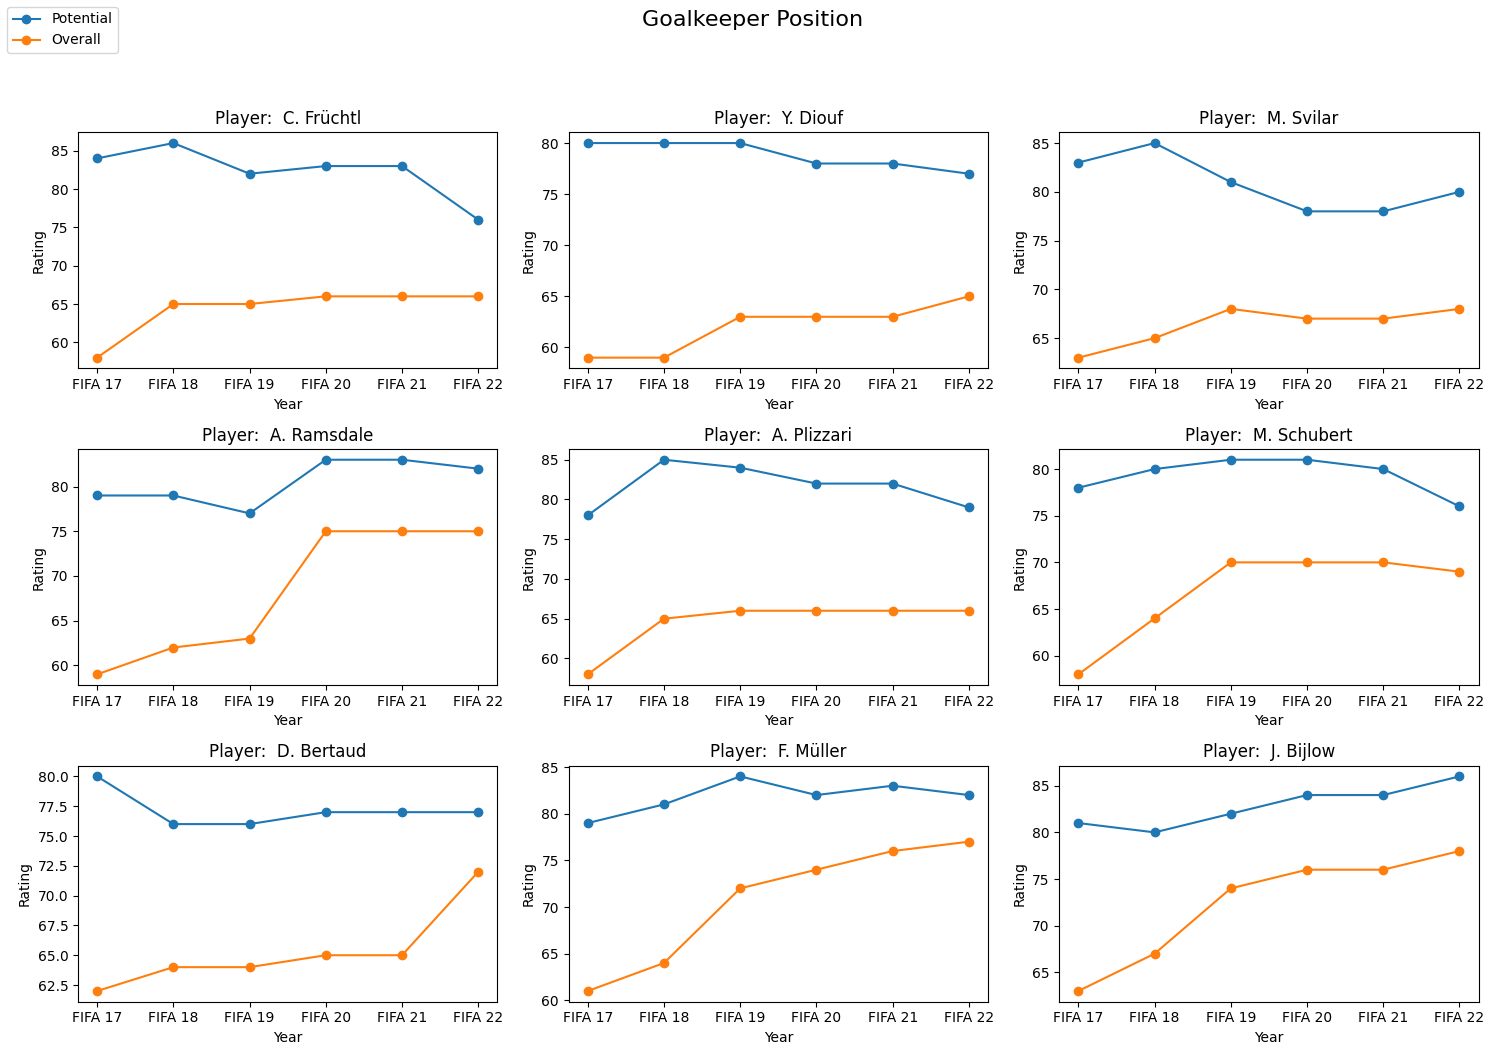

In [ ]:
plot_summary(result_df_goalkeeper,"Goalkeeper Position")

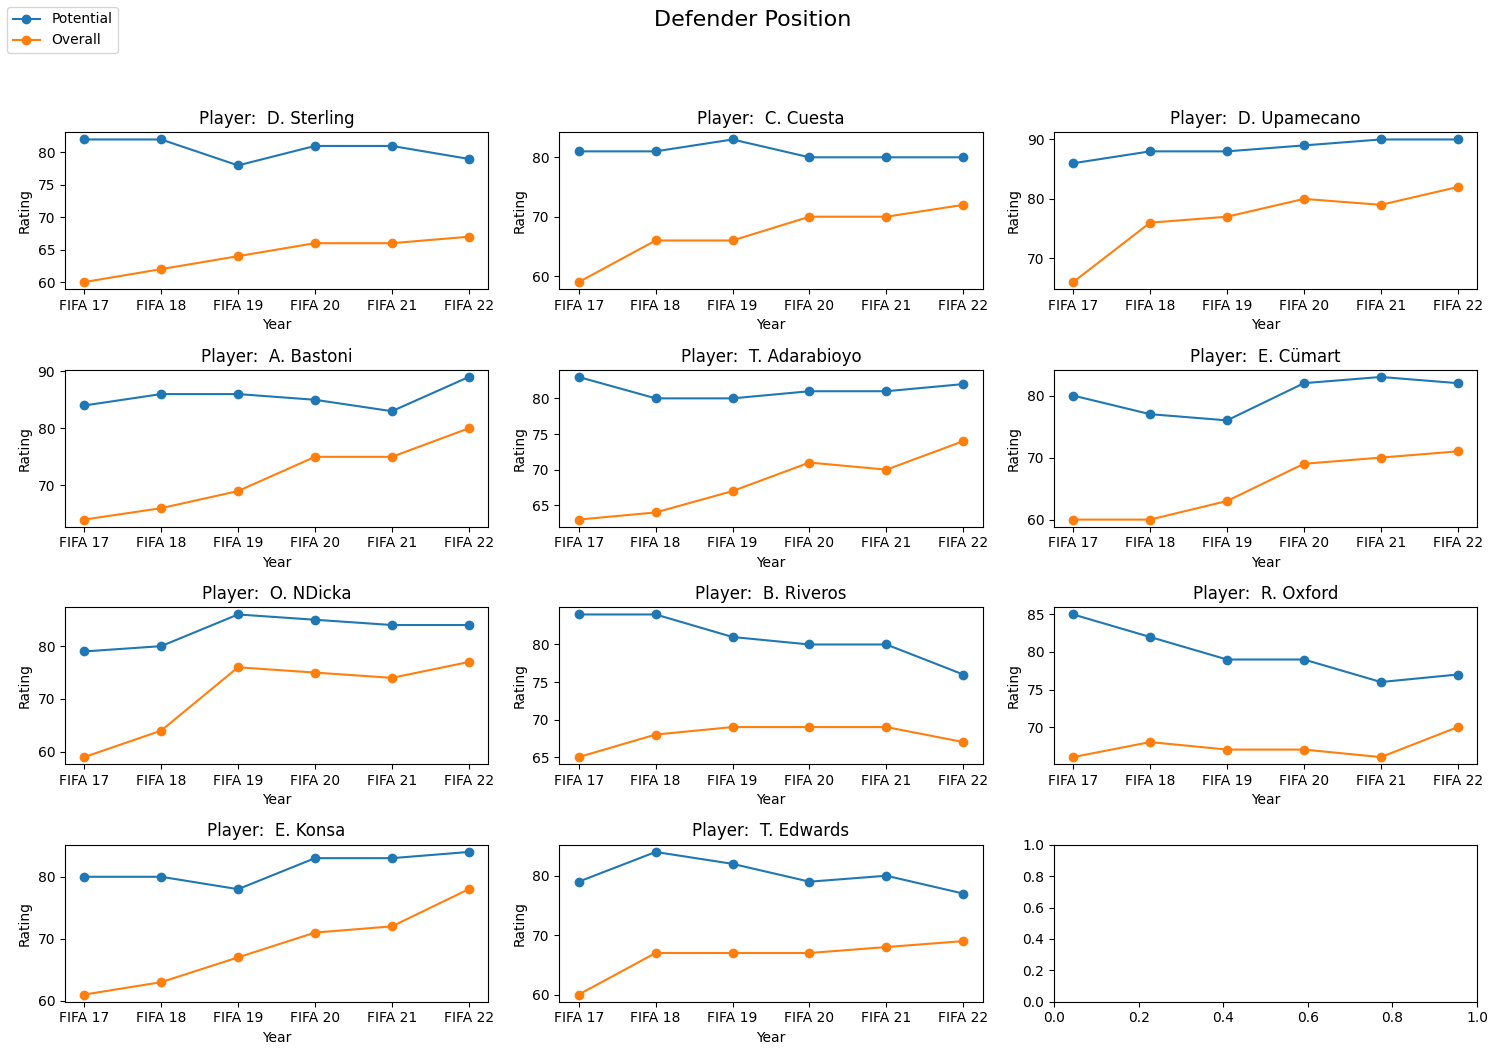

In [ ]:
plot_summary(result_df_defender,"Defender Position")

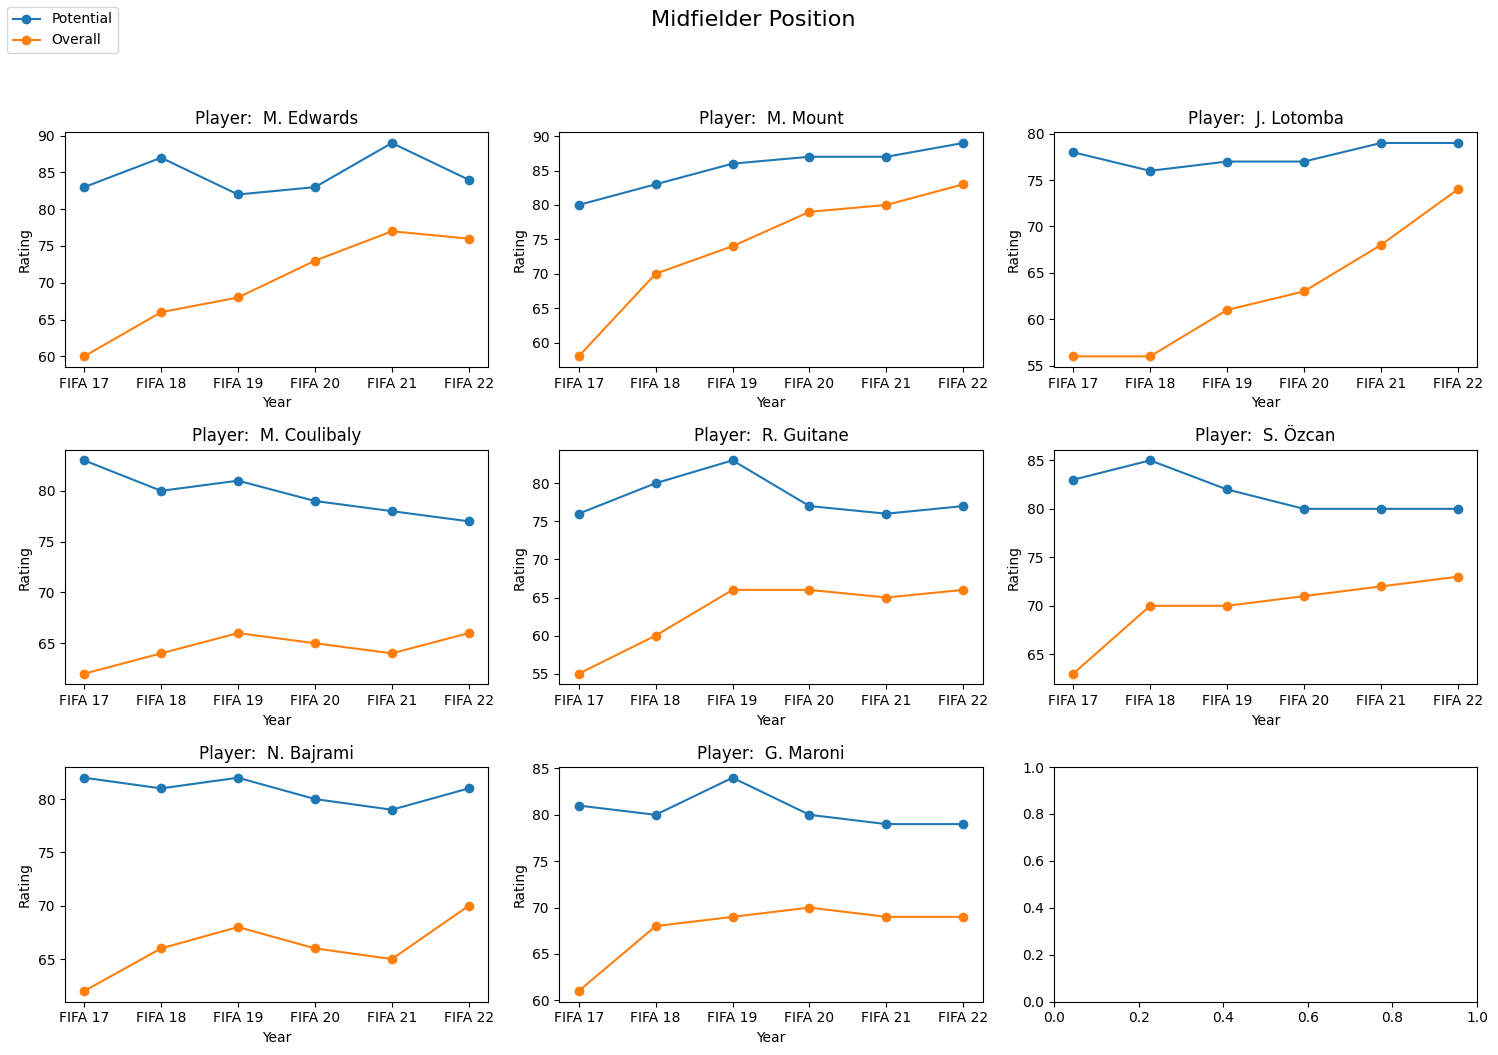

In [ ]:
plot_summary(result_df_midfielder,"Midfielder Position")

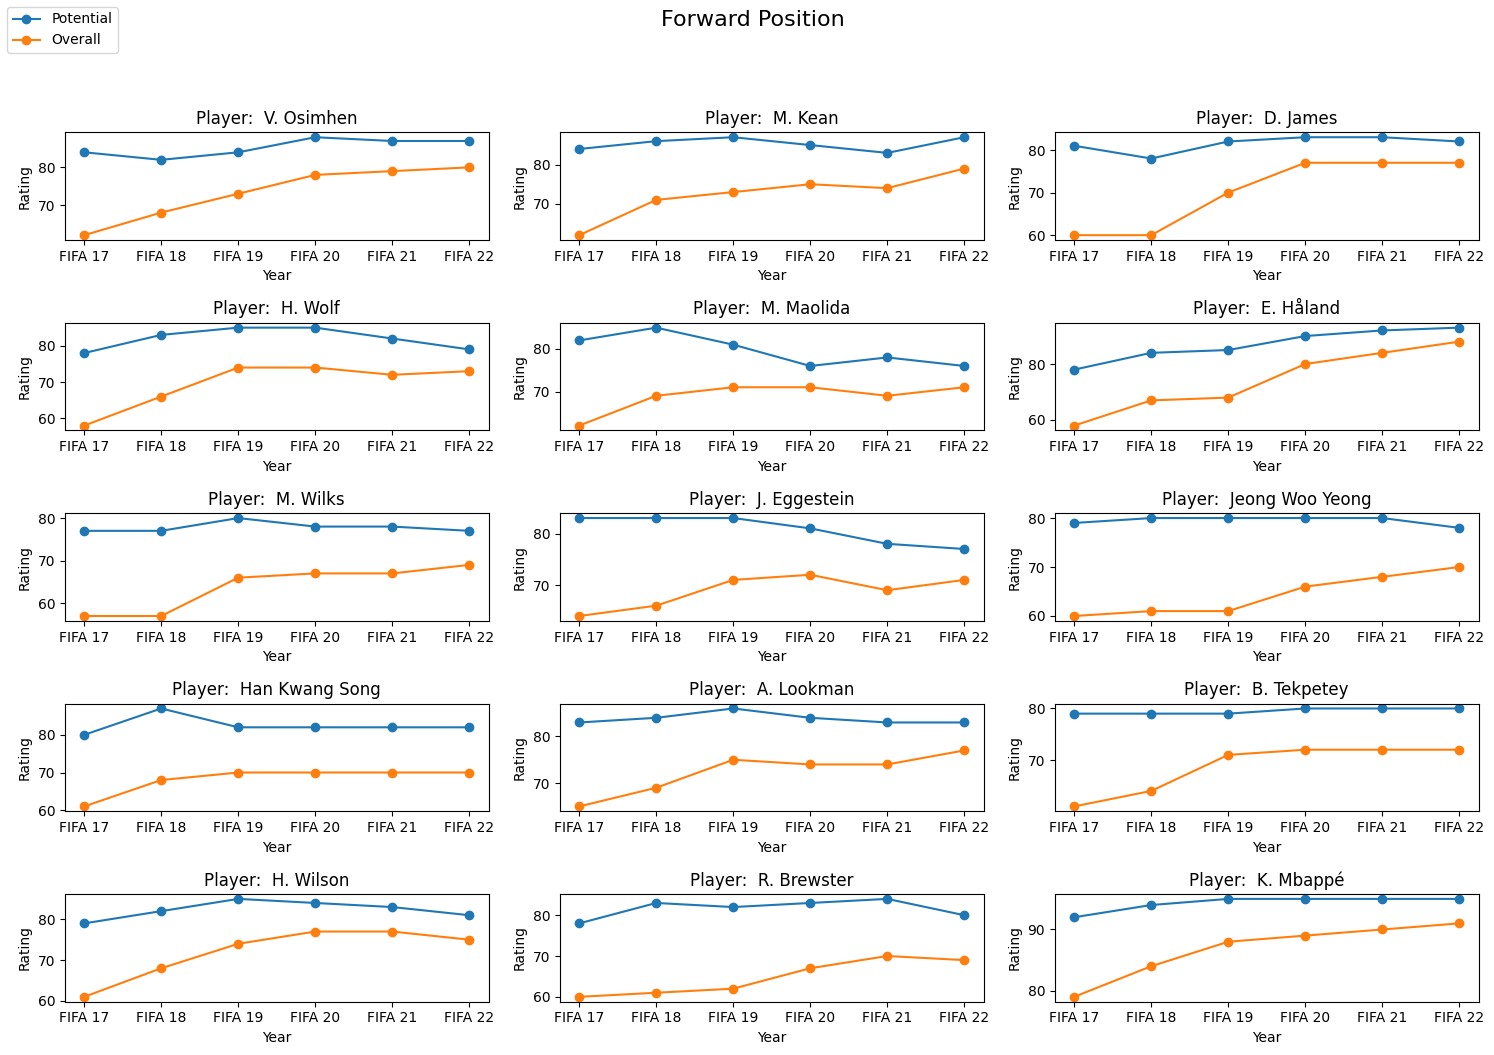

In [ ]:
plot_summary(result_df_forward,"Forward Position")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_club_distribution(data,year):
    top_players = data.nlargest(100, 'Overall')
    club_counts = top_players['Club'].value_counts()
    unique_counts = club_counts.value_counts().sort_index()
    max_count = unique_counts.idxmax()

    # Generate a color palette with the number of unique counts
    color_palette = sns.color_palette('tab10', len(unique_counts))
    color_dict = dict(zip(unique_counts.index, color_palette))

    # Sort the clubs based on the number of players in ascending order
    club_counts_sorted = club_counts.sort_values(ascending=True)

    # Plot the bar chart using Seaborn
    ax = sns.barplot(y=club_counts_sorted.index, x=club_counts_sorted.values, palette=[color_dict[count] for count in club_counts_sorted.values])

    # Add x-axis values beside the bars
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center')

    ax.set_xlabel('Number of Players')
    ax.set_ylabel('Club')
    ax.set_title(f'{year} Distribution of Top 100 Players by Club')

    # Create custom legend indicating club count-color mapping
    # legend_labels = unique_counts.index
    # legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[count]) for count in unique_counts.index]
    # plt.legend(legend_handles, legend_labels, title='Number of Players')

    # Invert the y-axis to show clubs from top to bottom
    ax.invert_yaxis()

    # Show the plot
    plt.show()



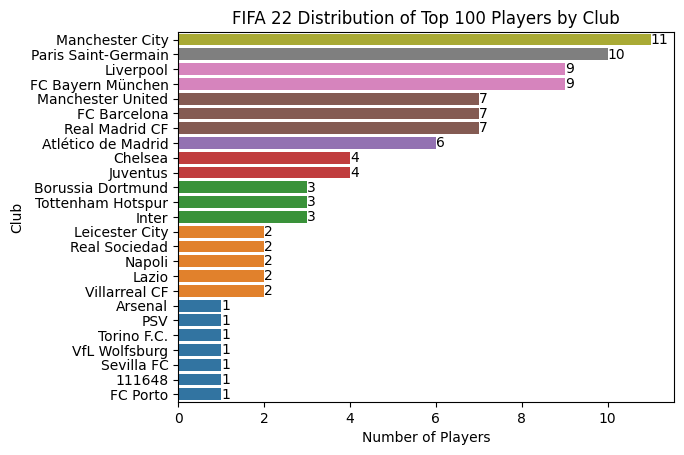

In [ ]:
# Assuming you have a dataset named 'fifa_data'

plot_club_distribution(fifa22,"FIFA 22")


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 126.3 MB/s eta 0:00:00


In [ ]:
def find_nationality_distribution(data, year):
    nationality_counts = data['Nationality'].value_counts().reset_index()
    nationality_counts.columns = ['Nationality', 'Count']
    nationality_counts['Year'] = year
    return nationality_counts


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import plotly.express as px

def plot_nationality_distribution(dataset, countries_df, top_n=200):
    # Select the top n players by overall rating
    top_players = dataset.nlargest(top_n, 'Overall')

    # Merge the nationality data with the countries dataframe based on country names
    merged_data = pd.merge(top_players, countries_df, left_on='Nationality', right_on='Country', how='left')

    # Group by country and count the number of players
    nationality_counts = merged_data.groupby(['Country', 'Longitude', 'Latitude']).size().reset_index(name='Count')

    # Create a hover text column with country name and player count
    nationality_counts['HoverText'] = nationality_counts['Country'] + '<br>' + 'Players: ' + nationality_counts['Count'].astype(str)

    # Create a Choropleth map using Plotly
    fig = px.choropleth_mapbox(
        nationality_counts,
        geojson=countries_df.geometry.__geo_interface__,
        locations='Country',
        color='Count',
        color_continuous_scale='Blues',
        range_color=(0, nationality_counts['Count'].max()),
        mapbox_style="carto-positron",
        hover_name='HoverText',
        hover_data={'Count': True},
        center={"lat": 30, "lon": 0},
        zoom=1,
        opacity=0.5,
        labels={'Count': 'Number of Players'}
    )

    fig.update_layout(
        title=f'Nationality Distribution of Top {top_n} Players',
        margin={"r": 0, "t": 0, "l": 0, "b": 0}
    )

    fig.show()


# Read the "countries" CSV file with latitude and longitude information
countries_df = gpd.read_file('countries.csv')

# Select a single dataset for a specific year
dataset = fifa22  # Replace with your dataset for a specific year

# Call the function to plot the nationality distribution
plot_nationality_distribution(dataset, countries_df, top_n=200)



/usr/local/lib/python3.10/dist-packages/geopandas/array.py:968: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:969: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:970: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:971: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_top_players_nationality(dataset, countries_file, n):
    # Get the top N players by overall
    top_players = dataset.nlargest(n, 'Overall')
    countries_file = read_csv("import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_top_players_nationality(dataset, n):
    # Get the top N players by overall
    top_players = dataset.nlargest(n, 'Overall')

    # Group by nationality and count the number of players
    nationality_counts = top_players['Nationality'].value_counts().reset_index()
    nationality_counts.columns = ['Nationality', 'Count']

    # Read the country coordinates data
    countries = pd.read_csv("countries.csv")

    # Merge nationality counts with the country coordinates
    merged_data = pd.merge(countries, nationality_counts, left_on='Country Code', right_on='Nationality', how='left')

    # Create a GeoDataFrame from the merged data
    gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data['Longitude'], merged_data['Latitude']))

    # Read the world map shapefile
    worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge world map with the GeoDataFrame
    merged_map = pd.merge(worldmap, gdf, on='Country Code', how='left')

    # Creating axes and plotting world map
    fig, ax = plt.subplots(figsize=(12, 6))
    merged_map.plot(color="lightgrey", ax=ax)

    # Plotting the nationality counts on the world map
    x = gdf['Longitude']
    y = gdf['Latitude']
    z = gdf['Count']
    plt.scatter(x, y, s=20*z, c=z, alpha=0.6, cmap='autumn')

    plt.colorbar(label='Number of Players')

    # Creating axis limits and title
    plt.xlim([-180, 180])
    plt.ylim([-90, 90])

    plt.title('Distribution of Top {} Players\' Nationalities'.format(n))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show the plot
    plt.show()
")
    # Group by nationality and count the number of players
    nationality_counts = top_players['Nationality'].value_counts().reset_index()
    nationality_counts.columns = ['Nationality', 'Count']

    # Read the country coordinates data
    countries = pd.read_csv(countries_file)

    # Merge nationality counts with the country coordinates
    merged_data = pd.merge(countries, nationality_counts, left_on='Country Code', right_on='Nationality', how='left')

    # Create a GeoDataFrame from the merged data
    gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data['Longitude'], merged_data['Latitude']))

    # Read the world map shapefile
    worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge world map with the GeoDataFrame
    merged_map = pd.merge(worldmap, gdf, on='Country Code', how='left')

    # Creating axes and plotting world map
    fig, ax = plt.subplots(figsize=(12, 6))
    merged_map.plot(color="lightgrey", ax=ax)

    # Plotting the nationality counts on the world map
    x = gdf['Longitude']
    y = gdf['Latitude']
    z = gdf['Count']
    plt.scatter(x, y, s=20*z, c=z, alpha=0.6, cmap='autumn')

    plt.colorbar(label='Number of Players')

    # Creating axis limits and title
    plt.xlim([-180, 180])
    plt.ylim([-90, 90])

    plt.title('Distribution of Top {} Players\' Nationalities'.format(n))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show the plot
    plt.show()

plot_top_players_nationality(dataset,countries.csv, 200)


NameError: ignored

In [ ]:
pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 111.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102735 sha256=cc96df6e0e3cf1fdf9356d0d4f3c95fb636b032bef92807421aa8178d757fd18
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_nationality_distribution(dataset, countries_df, top_n):
    # Merge the nationality data with the countries dataframe based on country names
    merged_data = pd.merge(dataset, countries_df, left_on='Nationality', right_on='Country', how='left')

    # Get the top N players by overall
    top_players = merged_data.nlargest(top_n, 'Overall')

    # Group by country and count the number of players
    nationality_counts = top_players.groupby(['Nationality']).size().reset_index(name='Count')

    # Merge the nationality counts with the countries dataframe based on country names
    merged_counts = pd.merge(countries_df, nationality_counts, left_on='Country', right_on='Nationality', how='left')

    # Create a GeoDataFrame for the merged data
    gdf = gpd.GeoDataFrame(merged_counts)

    # Create the world map using GeoPandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Plot the world map with the nationality counts
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_aspect('equal')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)

    world.plot(ax=ax, color='lightgray', edgecolor='white')
    gdf.plot(ax=ax, column='Count', cmap='Blues', linewidth=0.8, edgecolor='white', legend=True, cax=cax)

    ax.set_title('Top {} Nationalities of Players'.format(top_n))
    ax.set_axis_off()

    # Show the plot
    plt.show()

# Example usage
plot_nationality_distribution(dataset, countries_df, top_n=200)



In [ ]:
datasets = [(fifa20, '2020'), (fifa21, '2021'), (fifa22, '2022')]
for dataset, year in datasets:
    nationality_distribution = find_nationality_distribution(dataset, year)
    plot_nationality_distribution(nationality_distribution)


In [ ]:
pip install mplsoccer

In [ ]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

def find_dream_team(dataset,formation):
    # Remove rows with null values in the 'Position' column
    dataset = dataset.dropna(subset=['Position'])
    if formation=="433":
    # Define the core positions
          core_positions = ['GK','CB','RB','LB', 'CM','CDM','RW','LW','CF']
          double = ['CB','CM']
    if formation == "442":
          core_positions = ['GK','CB','RB','LB', 'CM', 'RM', 'LM','ST']
          double = ['CB','CM','ST']
    if formation == "4231":
          core_positions = ['GK','CB','RB','LB', 'CM','CDM','CAM','RW','LW','ST']
          double = ['CB']
    # Initialize an empty dictionary to store the dream team
    dream_team = defaultdict(list)

    # Find the top player for each core position
    for position in core_positions:
        if position in double:
          top_players = dataset.loc[dataset['Best Position'].str.strip() == position].nlargest(2, 'Overall')
        else:
          top_players = dataset.loc[dataset['Best Position'].str.strip() == position].nlargest(1, 'Overall')
        if not top_players.empty:
              for i in range(len(top_players)):
                player_name = top_players.iloc[i]['Name']
                dream_team[position].append(player_name)

    return dream_team



from mplsoccer import Pitch
import matplotlib.pyplot as plt

from mplsoccer import Pitch
import matplotlib.pyplot as plt

def plot_dream_team(dream_team,year):
    pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
    fig, ax = pitch.draw()

    # Define the positions on the pitch for the dream team
    positions = {
        'GK': [(5, 40)],
        'CB': [(25, 30),(25,50)],
        'RB': [(25, 70)],
        'LB': [(25, 5)],
        'CM': [(65, 30),(65,50)],
        'CDM': [(40, 40)],
        'CAM': [(85, 40)],
        'RM': [(70, 70)],
        'LM': [(70, 5)],
        'RW': [(90, 70)],
        'LW': [(90, 5)],
        'CF': [(100, 40)],
        'ST': [(105, 35),(105,45)]
    }

    # Plot the dream team players on the pitch
    # Plot the dream team players on the pitch
    for position, players in dream_team.items():
        for i, player_name in enumerate(players):
            coords = positions[position][i]
            ax.text(coords[0], coords[1], player_name, color='black', ha='center', va='center', fontsize=12, fontweight='bold')

    plt.title(f"{year} Dream Team with Formation : {formation}")
    plt.show()
formations= ["433","4231","442"]
datasets=[(fifa20,"FIFA20"),(fifa21,"FIFA21"),(fifa22,"FIFA22")]
# Call the functions to find the dream team and plot it on the pitch
for tup in datasets:
  for formation in formations:
      dream_team = find_dream_team(tup[0],formation)
      plot_dream_team(dream_team,tup[1])

formations = ["433", "4231", "442"]
datasets = [(fifa20, "FIFA20"), (fifa21, "FIFA21"), (fifa22, "FIFA22")]



In [ ]:
def get_club_emphasis(dataset, attribute):
    club_emphasis = dataset.groupby('Club')[attribute].mean().sort_values(ascending=False)
    return club_emphasis.head(10)

def plot_club_emphasis(dataset, attribute):
    club_emphasis = get_club_emphasis(dataset, attribute)
    # Plotting code...

# Example usage
club_overall_emphasis = get_club_emphasis(fifa21, 'Overall')


print(club_overall_emphasis)
# plot_club_emphasis(fifa_data, 'Overall')
# plot_club_emphasis(fifa_data, 'Potential')
